# **Model Machine Learning untuk Estimasi Harga Mobil Bekas di Arab Saudi**
---

## **Business Understanding**

### **Latar Belakang**

Pasar mobil bekas di Arab Saudi terus mengalami pertumbuhan yang signifikan, didorong oleh permintaan konsumen terhadap kendaraan yang lebih terjangkau dan peningkatan mobilitas. Namun, menentukan harga jual mobil bekas yang wajar bisa menjadi tantangan bagi penjual maupun pembeli karena banyaknya faktor yang mempengaruhi harga, seperti merek, tahun produksi, jarak tempuh, ukuran mesin, dan fitur lainnya. Dengan meningkatnya penggunaan teknologi data dan kecerdasan buatan, metode machine learning dapat dimanfaatkan untuk memprediksi harga mobil bekas secara lebih akurat dan efisien.

Syarah.com adalah platform e-commerce otomotif terkemuka di Arab Saudi yang menyediakan layanan jual beli mobil baru dan bekas secara online. Didirikan pada tahun 2015 dan berbasis di Riyadh, Syarah telah merevolusi cara konsumen membeli mobil dengan menawarkan pengalaman yang mudah, aman, dan terpercaya.

Platform jual beli mobil seperti syarah.com ingin meningkatkan pengalaman pengguna dan efisiensi transaksi dengan menyediakan estimasi harga mobil bekas yang akurat berdasarkan karakteristik kendaraan. Dengan model prediksi harga yang andal, pengguna dapat lebih percaya diri dalam menentukan harga jual maupun pembelian mobil, sehingga meningkatkan kepercayaan dan kepuasan dalam platform.

### **Masalah**
- Harga mobil bekas sangat bervariasi, dipengaruhi oleh banyak faktor seperti tahun produksi, kilometer tempuh, merk, dan kondisi kendaraan, yang sering kali tidak mudah dinilai secara objektif oleh penjual maupun pembeli.
- Penjual cenderung menetapkan harga berdasarkan intuisi atau referensi terbatas, yang dapat menyebabkan mobil overprice (sulit terjual) atau underprice (rugi secara ekonomi).
- Tidak adanya sistem acuan harga otomatis di platform jual beli mobil membuat pembeli berisiko membayar lebih mahal, dan perusahaan kehilangan potensi margin keuntungan.
- Proses manual dalam mengevaluasi harga juga tidak efisien secara operasional bagi platform seperti Syarah.com yang menangani ribuan listing.

### **Tujuan Analisis**
- Membangun model prediksi harga mobil bekas berbasis machine learning untuk pasar Arab Saudi, guna menghasilkan estimasi harga yang akurat dan dapat diandalkan.
- Mengidentifikasi dan menganalisis fitur-fitur paling berpengaruh terhadap harga mobil, seperti tahun produksi, kilometer, merk, ukuran mesin, dan lainnya.
- Menyediakan sistem estimasi harga otomatis yang dapat diintegrasikan ke platform Syara.com, sehingga membantu:
    + Penjual menetapkan harga jual yang kompetitif
    + Pembeli memiliki acuan harga wajar
    + Perusahaan mengoptimalkan efisiensi operasional dan margin keuntungan

### **Stakeholder: Tim Produk dan Teknologi Syarah.com**
Deskripsi:
Tim Produk dan Teknologi merupakan pihak internal yang bertanggung jawab atas pengembangan, implementasi, dan pemeliharaan fitur-fitur baru di platform Syarah.com, termasuk integrasi sistem machine learning untuk estimasi harga mobil bekas.

### **Evaluasi Metrik & Alasan Memilihnya**
1. Mean Absolute Error (MAE)

**MAE** mengukur rata-rata selisih absolut antara nilai aktual (`actual`) dan nilai prediksi (`predicted`):

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$


- **Satuan:** Sama dengan nilai target (contoh: riyal).
- **Kelebihan:** Mudah diinterpretasikan dan tidak terlalu sensitif terhadap outlier.
- **Kekurangan:** Tidak mempertimbangkan ukuran relatif kesalahan.

2. Mean Absolute Percentage Error (MAPE)

**MAPE** menghitung rata-rata kesalahan dalam bentuk **persentase** dari nilai aktual:

$$
\text{MAPE} = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$

- **Satuan:** Persentase (%).
- **Kelebihan:** Memberikan gambaran skala kesalahan relatif terhadap nilai aktual, sehingga mudah dipahami dan dibandingkan.
- **Kekurangan:** Tidak stabil jika nilai aktual (`y_i`) mendekati nol.

#### Alasan Menggunakan MAE dan MAPE untuk Prediksi Harga Mobil Bekas

- MAE memberikan estimasi rata-rata kesalahan harga dalam satuan **riyal**, sehingga sangat mudah dipahami oleh pengguna bisnis.
- MAPE memberikan gambaran **persentase kesalahan rata-rata**, yang berguna untuk memahami kinerja model terhadap mobil dengan harga rendah hingga tinggi.
- MAE lebih **robust terhadap outlier**, cocok untuk data pasar mobil bekas yang bisa memiliki variasi ekstrem.
- MAPE memudahkan **perbandingan antar model dan periode** karena disajikan dalam satuan universal (%).

#### Kesimpulan

Menggunakan **MAE dan MAPE secara bersamaan** memberikan pemahaman yang lebih lengkap terhadap performa model:
- MAE untuk mengevaluasi seberapa jauh prediksi model dari nilai aktual secara absolut.
- MAPE untuk mengevaluasi seberapa besar kesalahan relatif terhadap harga mobil.

Kombinasi kedua metrik ini menjadikan evaluasi model prediksi harga mobil bekas lebih informatif dan relevan secara bisnis.


## **Data Understanding**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

# data splitting
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# missing value treatment
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# column transformer
from sklearn.compose import ColumnTransformer

# pipeline (menggabungkan beberapa tahapan jadi 1)
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score, cross_validate

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

# model machine learning
import statsmodels.api as sm # model interpretation
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# evaluation
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

# vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

# normaltest
from scipy.stats import normaltest

# Residual Plot
from yellowbrick.regressor import ResidualsPlot

# model interpretation
import shap

# save model
import joblib

import warnings
# Nonaktifkan semua warning
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


### Penjelasan Kolom
| Nama Kolom     | Deskripsi                                                                 |
|----------------|---------------------------------------------------------------------------|
| Type           | Tipe atau jenis mobil bekas (misalnya sedan, SUV, dll).                   |
| Region         | Wilayah di Arab Saudi tempat mobil ditawarkan untuk dijual.              |
| Make           | Merek atau perusahaan pembuat mobil (misalnya Toyota, Hyundai, dll).     |
| Gear_Type      | Jenis transmisi mobil (otomatis/manual).                                 |
| Origin         | Asal mobil (misalnya lokal atau impor).                                  |
| Options        | Fitur tambahan yang dimiliki mobil (misalnya ABS, Airbag, dll).          |
| Year           | Tahun pembuatan mobil.                                                   |
| Engine_Size    | Kapasitas mesin mobil (biasanya dalam liter atau cc).                    |
| Mileage        | Jarak yang telah ditempuh mobil (kilometer).                             |
| Negotiable     | Bernilai `True` jika harga bisa dinegosiasikan (biasanya jika Price = 0).|
| Price          | Harga mobil bekas dalam mata uang lokal (SAR - Saudi Riyal).             |


### Pemeriksaan Nilai Unik

In [4]:
# Tampilkan seluruh isi teks dalam setiap sel
# pd.set_option('display.max_colwidth', None) 

def unique_value(df):
    unique = pd.DataFrame()
    unique['Columns'] = df.columns
    unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    unique['Unique'] = [df[col].unique() for col in (df.columns)] 
    return unique

unique_value(df)

,Columns,Unique Count,Unique
0,Type,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3,..."
1,Region,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, ..."
2,Make,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche,..."
3,Gear_Type,2,"[Manual, Automatic]"
4,Origin,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,3,"[Standard, Full, Semi Full]"
6,Year,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 199..."
7,Engine_Size,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, ..."
8,Mileage,1716,"[421000, 80000, 140000, 220000, 49000, 25000, ..."
9,Negotiable,2,"[True, False]"


Insight:

1. **Tipe Mobil (`Type`)**  
   Terdapat 347 jenis mobil bekas yang berbeda dalam dataset ini, menunjukkan keragaman model mobil yang cukup tinggi.

2. **Wilayah (`Region`)**  
   Data mencakup 27 wilayah berbeda tempat mobil-mobil bekas tersebut ditawarkan untuk dijual.

3. **Merek (`Make`)**  
   Terdapat 58 merek mobil yang berbeda dalam dataset ini, mencerminkan beragamnya produsen mobil yang tersedia.

4. **Jenis Transmisi (`Gear_Type`)**  
   Dataset ini didominasi oleh dua jenis transmisi: manual dan otomatis.

5. **Asal Mobil (`Origin`)**  
   Asal mobil dikelompokkan dalam empat kategori: Saudi, Gulf Arabic, Other, dan Unknown.  
   Untuk kategori “Unknown”, perlu dilakukan analisis lebih lanjut untuk mengetahui apakah ini merupakan data anomali atau kesalahan pencatatan.

6. **Kelengkapan Fitur (`Options`)**  
   Fitur mobil diklasifikasikan ke dalam tiga jenis: Standard, Full, dan Semi Full.

7. **Tahun Produksi (`Year`)**  
   Dataset mencakup mobil yang diproduksi selama rentang waktu 50 tahun, mulai dari tahun 1963 hingga 2022, menunjukkan cakupan waktu yang luas.

8. **Kapasitas Mesin (`Engine_Size`)**  
   Terdapat 71 variasi ukuran mesin yang berbeda, yang memberikan gambaran tentang ragam spesifikasi teknis kendaraan.

9. **Jarak Tempuh (`Mileage`)**  
   Nilai jarak tempuh bervariasi secara signifikan, mencerminkan perbedaan dalam penggunaan dan kondisi mobil-mobil bekas tersebut.

10. **Bisa Ditawar (`Negotiable`)**  
   Informasi terkait harga yang dapat ditawar tercatat dalam dua kategori: bisa ditawar (`True`) dan tidak bisa (`False`).

11. **Harga (`Price`)**  
   Terdapat 467 variasi harga dalam dataset ini. Beberapa entri menunjukkan harga `0`, yang kemungkinan menandakan bahwa harga masih bisa dinegosiasikan atau mungkin berkaitan dengan entri yang asalnya `Unknown`, sehingga perlu ditinjau lebih lanjut untuk keperluan pembersihan data.


## **Pembersihan Data**

### Pemeriksaan Data Anomali

#### Tipe Mobil (Type)
- Temuan: ada beberapa tipe mobil dengan nama tidak normal, seperti: Furniture, Sylvian Bus, dll.
- Data ini tidak akan di drop dengan asumsi bahwa ada kesalahan pada saat translate data dari Bahasa Arab.

#### Kolom Harga (Price) dan Bisa Ditawar (Negotiable)

In [5]:
# Harga mobil 0
(df['Price'] == 0).sum()

1797

In [6]:
# Pengecekan apakah ada harga mobil yang tidak 0 tetapi kolom Negotiable True
df[(df['Price'] != 0) & (df['Negotiable'] == True)]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price


In [7]:
# Pengecekan apakah ada harga mobil yang tidak 0 tetapi kolom Negotiable False
df[(df['Price'] == 0) & (df['Negotiable'] == False)]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3168,Furniture,Riyadh,Toyota,Automatic,Other,Semi Full,2012,2.7,225000,False,0


- Terdapat 1 data mobil yang harganya 0 tetapi Negotiablenya False, kemungkinan ini adalah kesalahan input karena ini berarti mobil dijual secara gratis.
- Total terdapat 1797 mobil dalam dataset yang memiliki harga = 0, atau sekitar 31.9% dari keseluruhan data (5624 entri). Ini menunjukkan bahwa cukup banyak penjual yang belum mencantumkan harga tetap dan memungkinkan negosiasi.
- Variabel `Negotiable` secara sempurna memisahlan antara `Price = 0` dan `Price > 0`
    + Jika `Negotiable = True` -> `Price = 0`
    + Jika `Negotiable = Flae` -> `Price > 0` (tidak ada yang `Price = 0`)
    + Dapat disimpulkan bahwa ini termasuk **Perfect Separation**
- Dampak dari masalah ini adalah koefisien `Negotiable` akan mendekati ±∞ karena pemisahan sempurna, serta model bisa menghasilkan standard error yang tidak masuk akal
- Oleh karena itu, baris dengan `Price = 0` akan di drop, serta kolom `Negotiable` karena hanya akan berisi `False` setelah drop baris `Price = 0` juga akan di drop.

In [8]:
# drop price = 0
df = df[df['Price'] > 0]

# drop kolom Negotiable
df = df.drop(columns='Negotiable')

In [9]:
# Pengecekan harga mobil di bawah 10000 SAR
df[df['Price'] < 10000]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
20,Sunny,Riyadh,Nissan,Manual,Saudi,Standard,2011,1.4,290,7000
46,Elantra,Abha,Hyundai,Automatic,Saudi,Semi Full,2020,2.0,27000,1010
62,SEL,Tabouk,Mercedes,Automatic,Saudi,Full,1986,3.0,500000,5500
65,Malibu,Arar,Chevrolet,Automatic,Saudi,Standard,2021,1.5,24000,1200
110,Optra,Riyadh,Chevrolet,Automatic,Saudi,Standard,2007,1.6,2000000,5000
...,...,...,...,...,...,...,...,...,...,...
5521,Suburban,Al-Medina,Chevrolet,Automatic,Other,Semi Full,1997,6.0,292764,4000
5523,Tucson,Makkah,Hyundai,Automatic,Saudi,Semi Full,2020,2.0,58000,1313
5547,Optima,Qassim,Kia,Automatic,Saudi,Standard,2019,2.0,91000,1440
5599,Corolla,Dammam,Toyota,Manual,Other,Standard,1997,1.3,32500,7000


Harga mobil < 10000 SAR akan didrop karena:
- Karena pada Syarah.com terdapat harga cicilan, harga mobil yang berada di bawah 10000 SAR diasumsikan salah input dan bisa jadi merupakan harga cicilan.  
- Syarah.com (platform sumber data) menunjukkan harga mobil bekas paling murah biasanya di atas 10,000–15,000 SAR.
- Situs-situs serupa seperti haraj.com.sa dan hatla2ee.com juga jarang menampilkan mobil layak jalan di bawah 10000 SAR.

In [10]:
# drop harga mobil yang di bawah 10000 SAR
df = df[df['Price'] > 10000]

#### Asal Mobil (Origin)
- Terdapat inputan `Other` dan `Unknown` pada kolom `Origin`

In [11]:
print(df['Origin'].value_counts(normalize=True) * 100)

Origin
Saudi          75.607124
Gulf Arabic    13.167836
Other          10.820291
Unknown         0.404749
Name: proportion, dtype: float64


In [12]:
# Pengecekan banyak data Origin = unknown
(df['Origin'] == 'Unknown').sum()

15

Drop `Origin = Unknown`, karena:
- Menghapus 0.42% data tidak akan signifikan memengaruhi ukuran dataset atau analisis statistik. Lebih baik kehilangan sedikit data daripada mempertahankan noise yang tidak informatif.
- Nilai `Unknown` menunjukkan ketidaktahuan asal mobil, bukan kategori yang valid seperti `Other` ( yang bisa berarti mobil dari negara lain bukan Saudi atau Gulf Arabic). Tidak ada pola atau informasi yang bisa diekstrak dari nilai ini, jika tetap dipertahankan, model mungkin menganggap `unknown` sebagai kategori yang meaningful, padahal tidak.
- Jika digabung dengan `Other`, akan mencemari kategori `Other` dengan data yang sebenernya tidak diketahui. Sehingga analisis untuk mobil `Other` menjadi tidak murni (tercampur noise)
- Jika mengisi `Unknown` dengan nilai lain, bisa menimpulkan bias, karena mobil-mobil ini mungkin benar-benar bukan dari Saudi.


In [13]:
# Simpan hanya baris dimana origin bukan 'Unknown'
df = df[df['Origin'] != 'Unknown']

#### Cek Missing Value

In [14]:
df.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Price          0
dtype: int64

Tidak ada missing value

#### Cek Data Duplikat

In [15]:
df.duplicated().sum()

3

In [16]:
df[df.duplicated()]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,45000


In [17]:
# Drop duplicate data
df.drop_duplicates(inplace=True)

Penghapusan data duplikat dalam dataset mobil bekas dilakukan untuk memastikan bahwa setiap entri merepresentasikan mobil yang unik, sehingga model tidak mendapatkan informasi yang berlebihan dari data yang sama. Duplikasi data dapat menyebabkan bias pada hasil prediksi, menurunkan kemampuan generalisasi model, serta memperbesar risiko overfitting. Selain itu, duplikat dapat mengganggu perhitungan statistik, memperlambat proses komputasi, dan mengurangi keandalan analisis harga pasar. Oleh karena itu, menghapus baris duplikat merupakan langkah penting dalam pembersihan data untuk menghasilkan model prediksi harga yang akurat dan andal.

#### Cek Tipe Data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3688 entries, 1 to 5622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3688 non-null   object 
 1   Region       3688 non-null   object 
 2   Make         3688 non-null   object 
 3   Gear_Type    3688 non-null   object 
 4   Origin       3688 non-null   object 
 5   Options      3688 non-null   object 
 6   Year         3688 non-null   int64  
 7   Engine_Size  3688 non-null   float64
 8   Mileage      3688 non-null   int64  
 9   Price        3688 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 316.9+ KB


Ubah ke Kategori: `Type`, `Region`, `Make`, `Gear_Type`, `Origin`, `Options`

In [19]:
df['Type'] = df['Type'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Make'] = df['Make'].astype('category')
df['Gear_Type'] = df['Gear_Type'].astype('category')
df['Origin'] = df['Origin'].astype('category')
df['Options'] = df['Options'].astype('category')

In [20]:
df_clean = df.copy()

## **EDA**

### Scatter Plot Kolom Numerikal Kolom

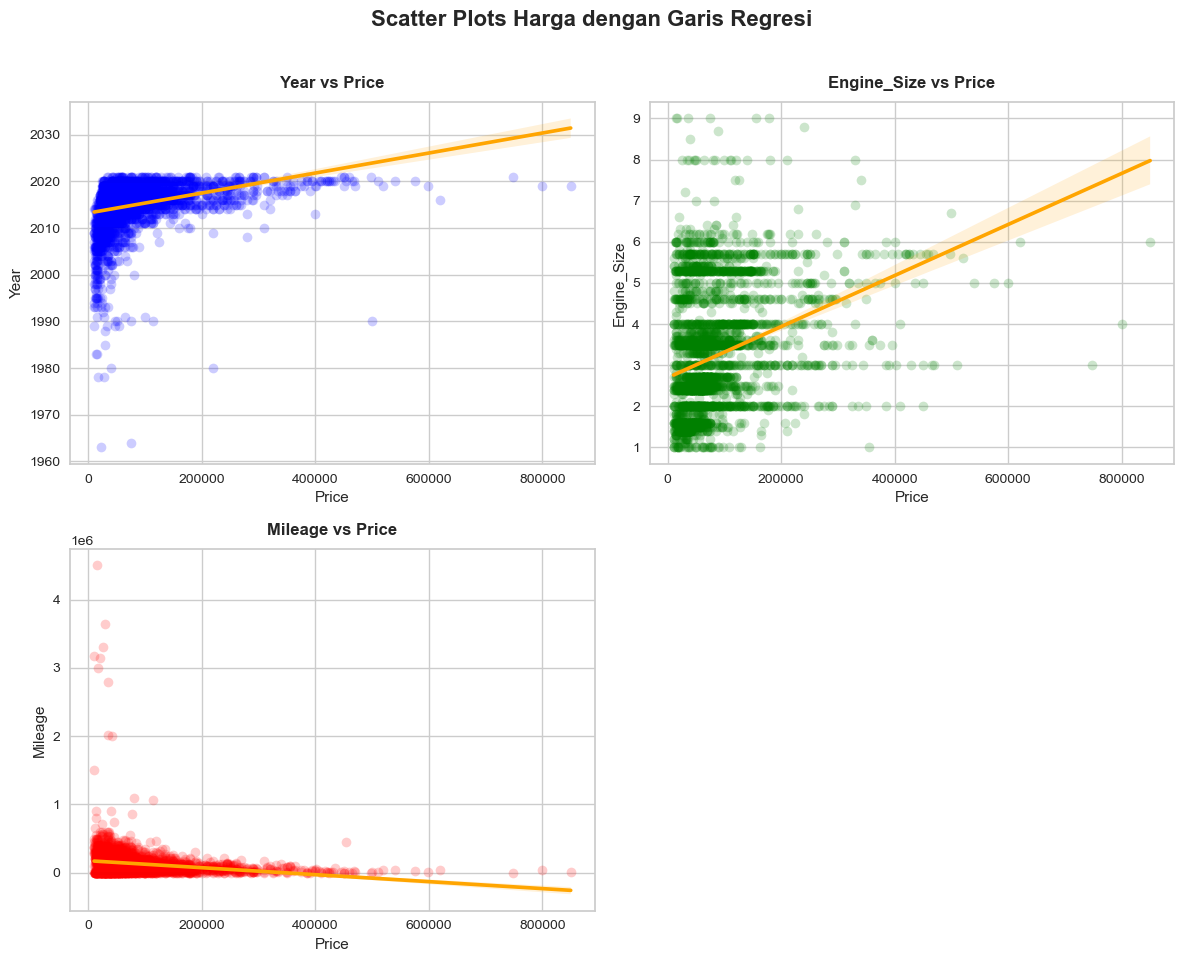

In [21]:
# Pilih kolom numerik yang relevan
numeric_columns = ['Year', 'Engine_Size', 'Mileage', 'Price']

# Pilih kolom numerik dari DataFrame
data = df[numeric_columns]

# Membuat plot pencar (scatter plot) dengan garis regresi dalam grid 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Definisikan daftar warna untuk scatter plot
scatter_colors = ['blue', 'green', 'red', 'purple']

# Loop untuk membuat plot masing-masing variabel terhadap Price
for i, (col, color) in enumerate(zip(numeric_columns[:-1], scatter_colors)):
    sns.regplot(data=data, x='Price', y=col, ax=axes[i//2, i%2], 
                scatter_kws={'alpha': 0.2, 'color': color}, 
                line_kws={'color': 'orange'})
    axes[i//2, i%2].set_title(f'{col} vs Price', pad=10, fontweight='bold', fontsize=12)
    axes[i//2, i%2].set_xlabel('Price')
    axes[i//2, i%2].set_ylabel(col)

# Hapus subplot kosong pada baris dan kolom terakhir
fig.delaxes(axes[1, 1])

# Judul utama untuk keseluruhan figure
plt.suptitle('Scatter Plots Harga dengan Garis Regresi', fontsize=16, fontweight='bold')

# Tata letak yang rapi dengan ruang untuk judul
plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

Insight:

1. Year vs Price
    - Pola: Terlihat tren positif antara tahun kendaraan dan harga. Semakin baru tahun kendaraan, semakin tinggi harganya.
    - Kendaraan dengan tahun produksi yang lebih baru cenderung memiliki harga yang lebih tinggi. Hal ini sesuai dengan ekspektasi karena mobil baru biasanya memiliki teknologi dan kondisi yang lebih baik.

2. Engine_Size vs Price
    - Pola: Terdapat korelasi positif yang cukup kuat antara ukuran mesin dan harga. Mobil dengan mesin yang lebih besar cenderung memiliki harga lebih tinggi.
    - Ukuran mesin menjadi indikator penting dalam menentukan harga kendaraan. Mesin besar biasanya terdapat pada mobil premium, SUV, atau mobil performa tinggi, yang umumnya berharga mahal.

3. Mileage vs Price
    - Pola: Terdapat korelasi negatif yang cukup jelas antara jarak tempuh (mileage) dengan harga. Semakin besar jarak tempuh, semakin rendah harganya.
    - Kendaraan dengan jarak tempuh yang tinggi cenderung mengalami penurunan harga yang signifikan. Hal ini mengindikasikan bahwa mileage adalah salah satu faktor utama dalam depresiasi harga mobil.

### Barplot untuk Kolom Kategori

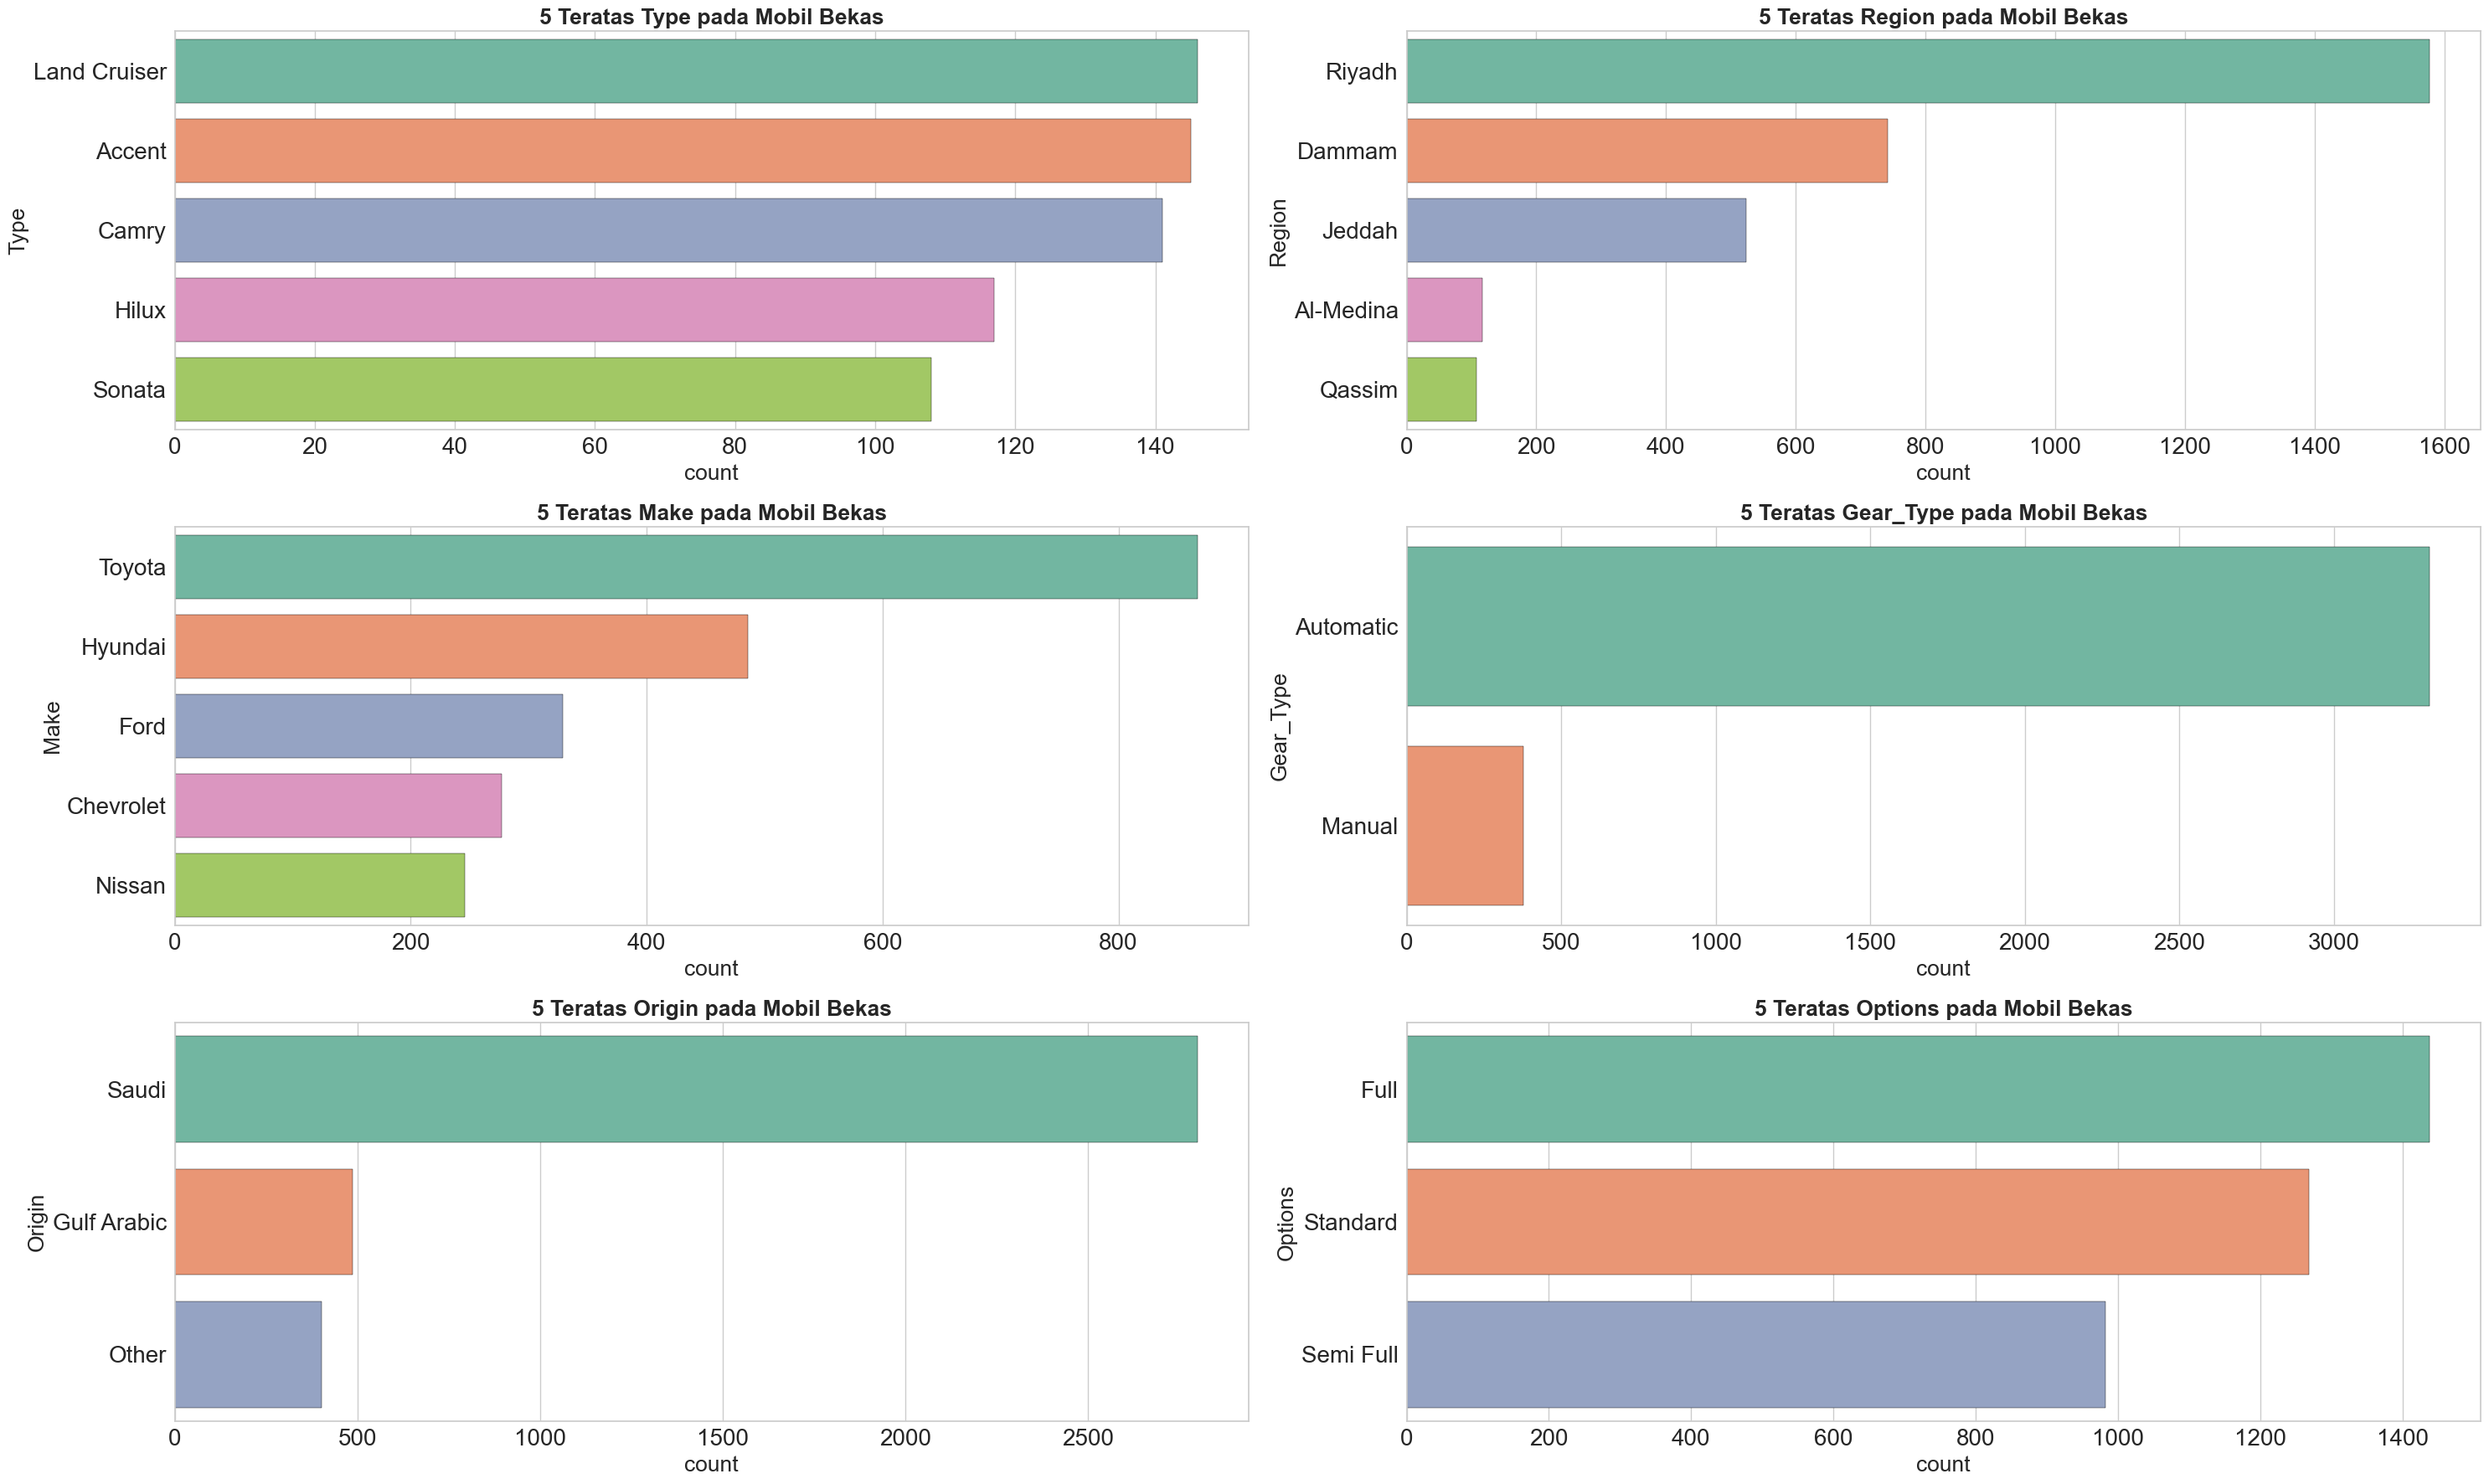

In [22]:
# Atur ukuran font default
plt.rcParams.update({
    'font.size': 16,             # Ukuran font umum
    'axes.titlesize': 19,        # Ukuran judul grafik
    'axes.labelsize': 19,        # Ukuran label sumbu
    'xtick.labelsize': 20,       # Ukuran angka pada sumbu X
    'ytick.labelsize': 20,       # Ukuran angka pada sumbu Y
    'figure.titlesize': 25       # Ukuran judul figure (jika ada)
})

# Buat figure dengan ukuran besar
fig = plt.figure(figsize=(30, 18))

# Inisialisasi penghitung subplot
count = 0

# Loop untuk setiap kolom bertipe kategori
for kolom in df.select_dtypes(include='category').columns:
    count += 1
    ax = plt.subplot(3, 2, count)
    
    # Buat countplot untuk 5 nilai teratas dari kolom
    sns.countplot(
        y=kolom,
        data=df,
        order=df[kolom].value_counts().sort_values(ascending=False).head(5).index,
        palette='Set2',
        edgecolor='black'
    )
    
    # Judul plot
    plt.title(f"5 Teratas {kolom} pada Mobil Bekas", fontweight='bold')
    
    # Tata letak agar tidak saling tumpang tindih
    fig.tight_layout()

# Tampilkan plot
plt.show()

Insight:
1. Type Mobil paling banyak dijual
    - Land Cruiser, Accent, dan Camry adalah tiga jenis mobil bekas yang paling banyak tersedia.
    - Menunjukkan preferensi pasar terhadap SUV besar dan sedan populer.

2. Distribusi Berdasarkan Wilayah (Region)
    - Riyadh merupakan wilayah dengan jumlah mobil bekas terbanyak, disusul oleh Dammam dan Jeddah.
    - Mengindikasikan konsentrasi pasar mobil bekas di kota-kota besar.

3. Merek (Make) Mobil Terpopuler
    - Toyota mendominasi pasar mobil bekas, diikuti oleh Hyundai dan Ford.
    - Menandakan kepercayaan dan preferensi masyarakat terhadap merek Jepang dan Korea.

4. Jenis Transmisi (Gear_Type)
    - Transmisi Automatic sangat mendominasi dibandingkan Manual.
    - Tren ini mencerminkan kenyamanan berkendara yang menjadi prioritas.

5. Asal Mobil (Origin)
    - Mayoritas mobil bekas berasal dari Saudi, kemudian Gulf Arabic dan Other.
    - Mungkin berkaitan dengan kebijakan impor atau kebiasaan pasar lokal.

6. Opsi Fitur (Options)
    - Mobil dengan fitur Full dan Standard paling umum ditemukan.
    - Opsi Semi Full juga cukup banyak, menunjukkan bahwa fitur tambahan cukup memengaruhi penawaran pasar.

### Cek Distribusi Data Numerik

In [23]:
# Informasi Umum
print(df.describe())

              Year  Engine_Size       Mileage          Price
count  3688.000000  3688.000000  3.688000e+03    3688.000000
mean   2014.954447     3.194523  1.352934e+05   80495.638015
std       4.913970     1.460188  1.876463e+05   72775.160083
min    1963.000000     1.000000  1.000000e+02   10500.000000
25%    2014.000000     2.000000  4.900000e+04   37000.000000
50%    2016.000000     2.700000  1.036940e+05   60000.000000
75%    2018.000000     4.000000  1.810000e+05   95000.000000
max    2021.000000     9.000000  4.500000e+06  850000.000000


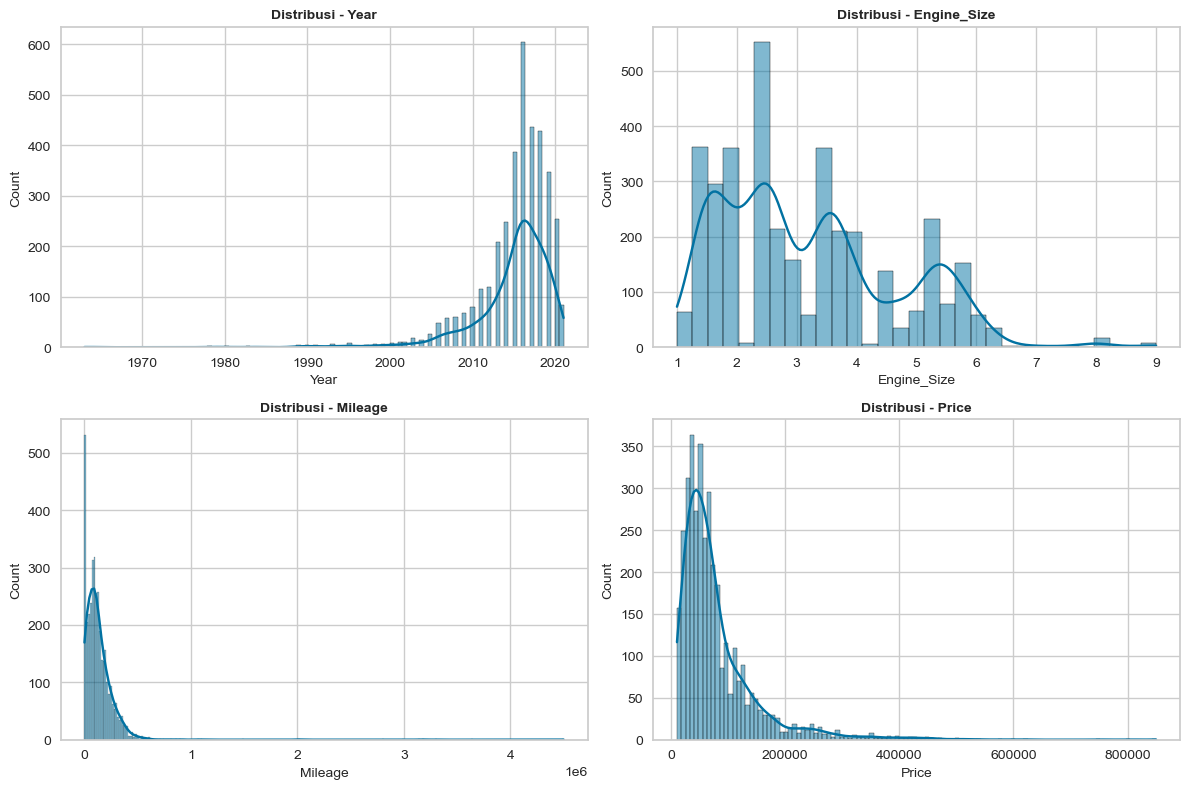

In [24]:
# Identifikasi kolom numerikal
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Atur ukuran font default
plt.rcParams.update({
    'font.size': 10,             # Ukuran font umum
    'axes.titlesize': 10,        # Ukuran judul grafik
    'axes.labelsize': 10,        # Ukuran label sumbu
    'xtick.labelsize': 10,       # Ukuran angka pada sumbu X
    'ytick.labelsize': 10,       # Ukuran angka pada sumbu Y
    'figure.titlesize': 20       # Ukuran judul figure (jika ada)
})

# Misal numerical_columns adalah list kolom numerik
num_cols = len(numerical_columns)
cols = 2  # Jumlah kolom per baris
rows = math.ceil(num_cols / cols)  # Hitung jumlah baris yang dibutuhkan

plt.figure(figsize=(12, rows * 4))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribusi - {col}', fontweight='bold')

plt.tight_layout()
plt.show()

Insight:
1. Distribusi - Year
    - Distribusi sangat berat ke kanan, menunjukkan mayoritas kendaraan adalah kendaraan baru.
    - Ada lonjakan signifikan pada tahun-tahun setelah 2010, terutama mendekati 2020.
    - Ini mengindikasikan bahwa data cenderung berfokus pada kendaraan relatif modern atau terbaru, bukan kendaraan lama.

2. Distribusi - Engine_Size
    - Distribusinya multimodal (memiliki beberapa puncak), menunjukkan adanya kelompok mesin dengan ukuran yang umum (misalnya sekitar 2.0L dan 3.0L).
    - Mesin besar (>5L) jarang digunakan, mengindikasikan kendaraan performa tinggi adalah minoritas.
    - Mesin kecil (~1.0L–2.5L) mendominasi, kemungkinan karena efisiensi bahan bakar atau segmentasi pasar massal (mobil keluarga, city car).

3. Distribusi - Mileage
    - Distribusi sangat skewed ke kanan: mayoritas kendaraan memiliki jarak tempuh yang rendah.
    - Hanya sedikit kendaraan dengan mileage sangat tinggi (>1 juta km), dan itu adalah outlier.
    - Bisa diartikan bahwa mayoritas kendaraan dalam dataset ini masih dalam kondisi pemakaian wajar atau relatif baru.

4. Distribusi - Price
    - Harga kendaraan sangat tidak merata, dan juga right-skewed.
    - Mayoritas kendaraan dijual di bawah 200.000 satuan mata uang, dengan jumlah signifikan di bawah 100.000.
    - Terdapat beberapa kendaraan mewah (outlier) dengan harga tinggi hingga mendekati 800.000, namun sangat sedikit.

### Cek Outliers

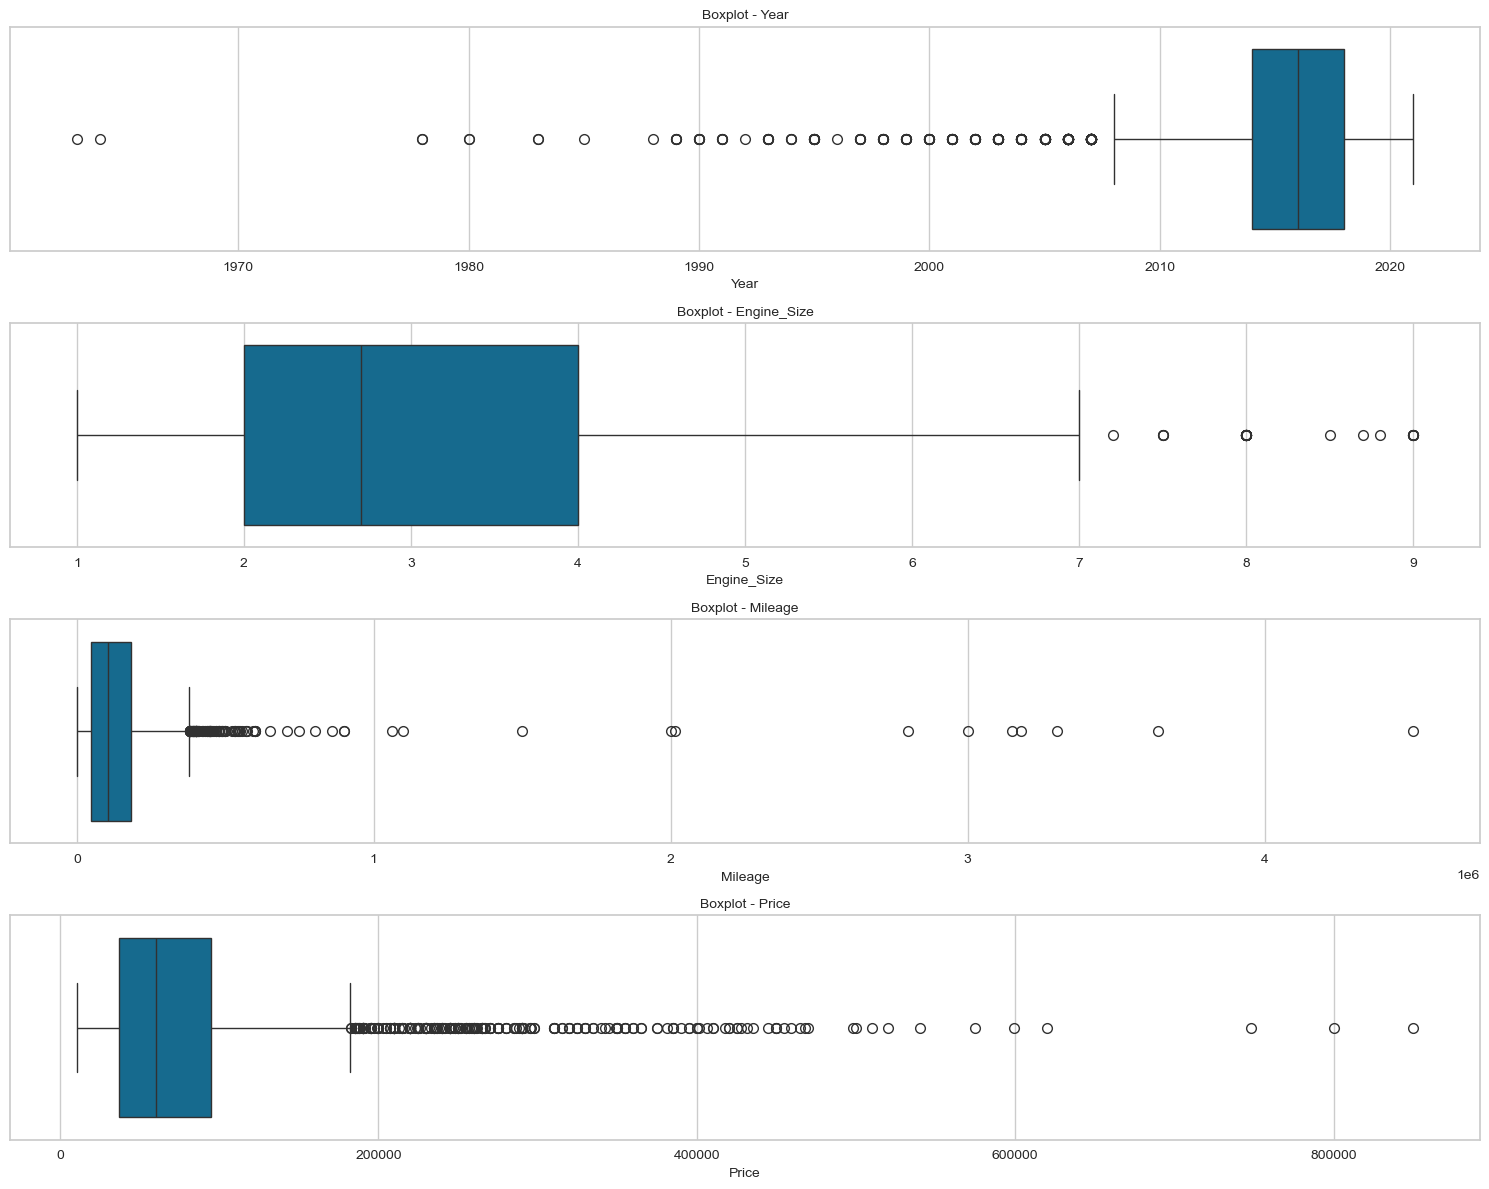

In [25]:
# Identifikasi kolom numerikal
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Boxplots untuk semua kolom numerik
plt.figure(figsize=(15, len(numerical_columns) * 3))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

In [26]:
# Dictionary kosong untuk menyimpan info
outliers_info = {}

# Menghitung Q1, Q3, dan IQR untuk setiap kolom numerik
for column in numerical_columns:
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas bawah dan atas (mild outlier)
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    # Menghitung batas ekstrem atas
    batas_ekstrem_atas = Q3 + 3 * IQR

    # Mengidentifikasi outlier dan outlier ekstrem
    kondisi_outlier = (df_clean[column] < batas_bawah) | (df_clean[column] > batas_atas)
    kondisi_outlier_ekstrem_atas = df_clean[column] > batas_ekstrem_atas

    outlier = df_clean[kondisi_outlier]
    outlier_ekstrem = df_clean[kondisi_outlier_ekstrem_atas]

    # Menyimpan informasi ke dictionary
    outliers_info[column] = {
        'batas_bawah': batas_bawah,
        'batas_atas': batas_atas,
        'batas_ekstrem_atas': batas_ekstrem_atas,
        'jumlah_outlier': kondisi_outlier.sum(),
        'jumlah_outlier_ekstrem_atas': kondisi_outlier_ekstrem_atas.sum(),
        'indeks_outlier': outlier.index.tolist(),
        'indeks_outlier_ekstrem': outlier_ekstrem.index.tolist()
    }

# Ringkasan outliers
outliers_summary = {
    key: {
        'batas_bawah': value['batas_bawah'],
        'batas_atas': value['batas_atas'],
        'batas_ekstrem_atas': value['batas_ekstrem_atas'],
        'jumlah_outlier': value['jumlah_outlier'],
        'jumlah_outlier_ekstrem_atas': value['jumlah_outlier_ekstrem_atas']
    }
    for key, value in outliers_info.items()
}

# Membuat DataFrame ringkasan
df_summary = pd.DataFrame.from_dict(outliers_summary, orient='index')

# Mengatur urutan kolom
df_summary = df_summary[['batas_bawah', 'batas_atas', 'batas_ekstrem_atas',
                         'jumlah_outlier', 'jumlah_outlier_ekstrem_atas']]

# Menampilkan ringkasan
df_summary


,batas_bawah,batas_atas,batas_ekstrem_atas,jumlah_outlier,jumlah_outlier_ekstrem_atas
Year,2008.0,2024.0,2030.0,255,0
Engine_Size,-1.0,7.0,10.0,30,0
Mileage,-149000.0,379000.0,577000.0,124,24
Price,-50000.0,182000.0,269000.0,261,105


#### Year (Tahun)
- Distribusi tahun terkonsentrasi pada rentang 2005-2022. Ditemukan banyak outlier sebelum tahun 2000, termasuk unit dari 1960-1980-an.
- Data mobil di bawah tahun 2000 tidak akan digunakan dengan alasan:
    1. Ketidaksesuaian dengan Populasi Target
    Kendaraan dengan tahun produksi sebelum 2000 umumnya tidak merepresentasikan pasar mobil bekas konvensional yang ditujukan bagi pengguna umum. Unit-unit tersebut cenderung merupakan kendaraan koleksi atau telah berada di luar siklus ekonomi kendaraan harian, sehingga tidak relevan untuk dianalisis bersama kendaraan modern.

    2. Potensi Distorsi Statistik
    Kehadiran kendaraan dengan tahun produksi yang sangat tua dapat menyebabkan distribusi data menjadi tidak normal, serta mengganggu perhitungan statistik deskriptif seperti rata-rata usia kendaraan, standar deviasi, dan parameter regresi dalam pemodelan prediktif.

    3. Ketidaksesuaian Teknis dan Spesifikasi
    Mobil yang diproduksi sebelum tahun 2000 memiliki karakteristik teknis yang sangat berbeda dibandingkan mobil modern, baik dari segi teknologi, efisiensi, maupun fitur keselamatan. Perbedaan tersebut menyebabkan adanya inkonsistensi fitur yang menyulitkan proses normalisasi data serta pemodelan berbasis fitur.

    4. Minimnya Representasi di Pasar
    Kendaraan dengan usia lebih dari 20–25 tahun pada umumnya tidak lagi aktif diperdagangkan dalam pasar mobil bekas umum, sehingga keberadaannya dalam dataset menyebabkan bias terhadap hasil analisis yang seharusnya fokus pada unit yang masih memiliki nilai pasar dan permintaan aktif.

In [27]:
# drop data di tahun < 2000
df_clean = df_clean[df_clean['Year'] >= 2000]

#### Mileage (Jarak Tempuh)
Dalam konteks analisis data pasar mobil bekas, variabel Mileage (jarak tempuh kendaraan) merupakan indikator penting yang mencerminkan usia pemakaian kendaraan dan sangat memengaruhi nilai jualnya. Berdasarkan hasil analisis deskriptif dan metode deteksi outlier menggunakan Interquartile Range (IQR), ditemukan bahwa nilai mileage di atas 379.000 km termasuk dalam kategori outlier. Penghapusan nilai-nilai ekstrem ini dilakukan dengan pertimbangan sebagai berikut:
1. Jarak Tempuh Ekstrem Tidak Mewakili Kondisi Umum
Nilai maksimum dalam dataset mencapai 4.500.000 km, yang secara realistis sangat kecil kemungkinannya dicapai oleh kendaraan pribadi. Angka ini kemungkinan besar merupakan:
    - Kesalahan input data (misalnya satuan yang salah)
    - Atau kendaraan komersial ekstrem yang tidak relevan untuk pasar mobil bekas umum

2. Menurunkan Kualitas Analitik
Outlier mileage dapat:
    - Mengganggu visualisasi distribusi (histogram, boxplot)
    - Mempengaruhi rata-rata secara signifikan (mean mileage menjadi tertarik oleh ekstrem)
    - Menurunkan akurasi model prediktif harga atau usia kendaraan

3. Tidak Mewakili Pasar Sasaran
Dalam praktiknya, kendaraan dengan mileage di atas 300.000–400.000 km sudah mendekati akhir masa pakainya dan jarang diperjualbelikan dalam kondisi yang layak pakai. Oleh karena itu, mempertahankan data tersebut justru menciptakan bias terhadap segmentasi pasar yang sebenarnya dituju.

4. Menjaga Validitas dan Konsistensi Dataset
Menghapus data mileage ekstrem memastikan bahwa:
    - Dataset merepresentasikan kendaraan yang relevan untuk dianalisis
    - Model yang dikembangkan dari dataset memiliki generalisasi yang baik
    - Interpretasi hasil lebih sesuai dengan kenyataan pasar mobil bekas

In [28]:
df_clean = df_clean[df_clean['Mileage'] <= df_summary['batas_atas'][2]]

#### Engine Size (Ukuran Mesin)
- Sebagian besar mobil memiliki mesin di kisaran 1.5 - 4.5 L, dengan puncak sekitar 3.0L. Outlier terdeteksi untuk mesin di atas 7.0L, mencapai 9.0L
- Semua entri di atas mencatat Engine Size >= 8.0L, yang tidak umum untuk mobil penumpang biasa, bahkan untuk kelas premium.
- Ini sangat mengindikasi adanya kesalahan input, kemungkinan besar:
    + Salah konversi satuan (cc ke liter tanpa pembagian 1000)
- Tidak masuk akal bahwa hampir semua mobil dari brand berbeda memiliki ukuran mesin tepat 9.0 L.
- Jadi data dengan Engine > 7.0 L akan dihapus karena:
    + Secara teknis jarang sekali diproduksi untuk kendaraan umum
    + Berisiko menjadi outlier tidak valid dalam analisis.


In [29]:
df_clean = df_clean[df_clean['Engine_Size'] <= df_summary['batas_atas'][1]]

#### Price (Harga)
- Harga mobil sebagian besar berada di bawah 182000 SAR.
- Dalam analisis harga mobil bekas, kolom price merupakan variabel target utama. Keberadaan outlier ekstrem pada kolom ini dapat menyebabkan distorsi signifikan terhadap statistik deskriptif maupun hasil dari model prediktif seperti regresi atau algoritma machine learning.

Untuk itu, outlier ekstrem pada price diidentifikasi dan dihapus menggunakan metode Interquartile Range (IQR), dengan ambang batas Q3 + 3×IQR, sesuai dengan pendekatan robust yang umum digunakan dalam analisis data eksploratif.

Alasan Penghapusan:
1. Menghilangkan Gangguan dari Kasus Ekstrem
Nilai price yang jauh di atas pasar wajar sering kali merepresentasikan:
    - Kendaraan mewah sangat langka yang tidak relevan dengan populasi utama
    - Kesalahan input (e.g. salah satu nol berlebih)

2. Meningkatkan Kualitas Prediksi
Model prediktif seperti regresi linier atau random forest akan berusaha meminimalkan error untuk semua titik, termasuk outlier ekstrem, sehingga dapat menghasilkan bias terhadap prediksi harga normal. Dengan menghapus nilai ekstrem, model dapat belajar pola umum dengan lebih efektif.

3. Menjaga Representasi Data Pasar yang Nyata
Mayoritas mobil bekas di pasar berada dalam rentang harga yang wajar. Outlier ekstrem tidak mencerminkan realitas pasar dan mengganggu interpretasi hasil analisis pasar.

4. Memperbaiki Distribusi Data
Distribusi harga mobil bekas cenderung right-skewed. Menghapus outlier ekstrem membantu menstabilkan distribusi sehingga perhitungan statistik seperti rata-rata dan deviasi standar menjadi lebih representatif.

In [30]:
df_clean = df_clean[df_clean['Price'] <= df_summary['batas_ekstrem_atas'][3]]

### Analisis Korelasi Data Numerik

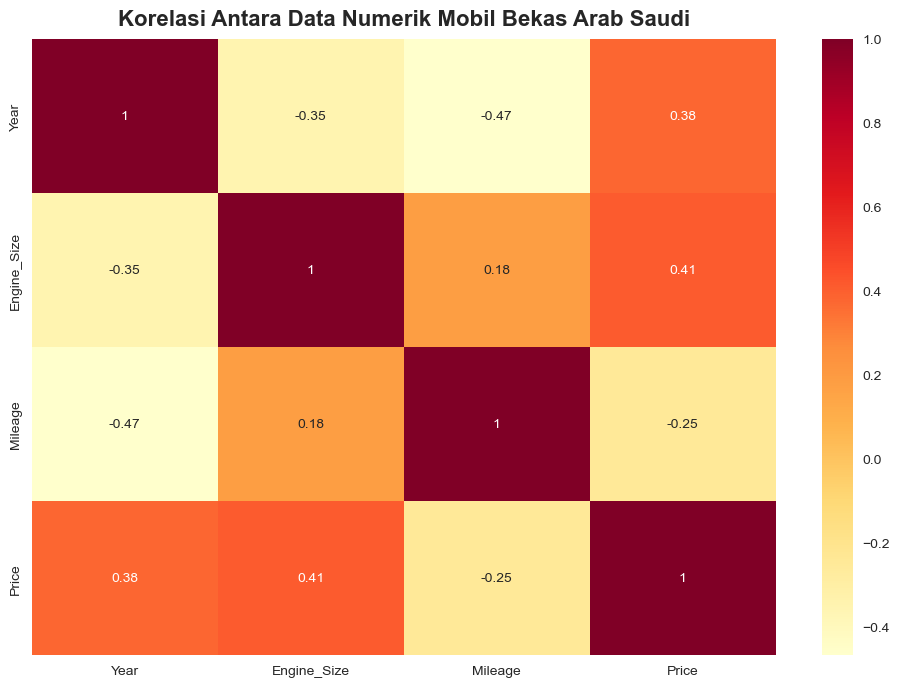

In [31]:
# Identifikasi kolom numerikal
numerical_columns = df_clean.select_dtypes(include=['int64', 'float64'])

df_clean_Corr = numerical_columns.corr(method = 'spearman')
plt.figure(figsize = (12,8))
sns.heatmap(df_clean_Corr, annot = True, cmap = 'YlOrRd')
plt.title('Korelasi Antara Data Numerik Mobil Bekas Arab Saudi', size=16, pad=10, fontweight='bold')
plt.show()

Insight:
1. Year vs. Price (r = 0.38)
    - Terdapat korelasi positif sedang antara tahun kendaraan dan harga.
    - Artinya, semakin baru tahun pembuatan mobil, semakin tinggi harganya — hal ini sangat wajar di pasar mobil bekas.

2. Engine_Size vs. Price (r = 0.41)
    - Korelasi positif moderat menunjukkan bahwa mobil dengan mesin yang lebih besar cenderung memiliki harga lebih tinggi.
    - Ini bisa dikaitkan dengan mobil performa tinggi, SUV, atau kendaraan premium yang umumnya lebih mahal.

3. Mileage vs. Price (r = -0.25)
    - Korelasi negatif lemah antara jarak tempuh dan harga, menandakan bahwa semakin tinggi mileage, semakin rendah harga mobil.
    - Walaupun lemah, arah korelasinya logis karena kendaraan yang sering dipakai cenderung mengalami penyusutan nilai.

## **Data Pre-Processing**

### 1. Define X dan y

In [32]:
# define y
y = df_clean['Price']

# define X
X = df_clean.drop(columns = 'Price')

### 2. Train Test Splitting

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

### 3. Encoding dan Scaling

Alasan Pemilihan Encoding dan Scaling

**1. Encoding**

> Encoding diperlukan untuk mengubah fitur kategorikal menjadi format numerik yang dapat diproses oleh algoritma machine learning. Pemilihan metode encoding disesuaikan dengan jumlah kategori dan sifat data.

1. Binary Encoding

**Fitur:** `Type`, `Region`, `Make`

  - Fitur-fitur ini memiliki **jumlah kategori yang cukup banyak**, terutama `Make` (merek mobil) dan `Region`.

    Alasan Pemilihan:
    - Mengurangi dimensi fitur dibandingkan OneHot Encoding.
    - Efisien dan lebih ringan secara komputasi.
    - Menghindari multikolinearitas.
    - Cocok untuk model tree-based seperti XGBoost.

2. OneHot Encoding

**Fitur:** `Gear_Type`, `Origin`, `Options`

  - Fitur-fitur ini memiliki **jumlah kategori yang sedikit** (2–5 kelas).

    Alasan Pemilihan
    - Menghindari pemaksaan urutan numerik yang tidak ada (non-ordinal).
    - Dimensi fitur tetap kecil karena jumlah kategori terbatas.

**2. Scaling**

> Scaling dibutuhkan untuk menyeragamkan skala fitur numerik agar model tidak memprioritaskan satu fitur karena nilainya lebih besar secara absolut.

- Robust Scaling

**Fitur:** `Year`, `Engine_Size`, `Mileage`

- **Alasan Pemilihan:**
  - **RobustScaler** menggunakan median dan interquartile range (IQR), sehingga:
    - Tidak terpengaruh oleh outlier.
    - Memberikan distribusi data yang lebih stabil untuk pelatihan model.

- Binary Encoding: `Type`, `Region`, `Make`
- OneHot Encoding: `Gear_Type`, `Origin`, `Options`
- Robust Scaling: `Year`, `Engine_Size`, `Mileage`

In [34]:
# pipeline transformasi
transformer = ColumnTransformer([
    ('Binary', BinaryEncoder(), ['Type', 'Region', 'Make']),
    ('onehot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options']), 
    ('robust', RobustScaler(), ['Year', 'Engine_Size', 'Mileage'])
], remainder = 'passthrough')

### 4. Transformed Train

In [35]:
transformed_train = pd.DataFrame(transformer.fit_transform(X_train), columns=transformer.get_feature_names_out())
transformed_train.head()

,Binary__Type_0,Binary__Type_1,Binary__Type_2,Binary__Type_3,Binary__Type_4,Binary__Type_5,Binary__Type_6,Binary__Type_7,Binary__Type_8,Binary__Region_0,...,Binary__Make_4,Binary__Make_5,onehot__Gear_Type_Manual,onehot__Origin_Other,onehot__Origin_Saudi,onehot__Options_Semi Full,onehot__Options_Standard,robust__Year,robust__Engine_Size,robust__Mileage
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.50,-0.60,-0.366852
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.00,0.30,-0.842295
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.75,-0.55,0.002934
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-2.50,1.30,1.475410
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.50,0.95,0.024590


### 5. Transformed Test

In [36]:
transformed_test = pd.DataFrame(transformer.transform(X_test), columns=transformer.get_feature_names_out())
transformed_test.head()

,Binary__Type_0,Binary__Type_1,Binary__Type_2,Binary__Type_3,Binary__Type_4,Binary__Type_5,Binary__Type_6,Binary__Type_7,Binary__Type_8,Binary__Region_0,...,Binary__Make_4,Binary__Make_5,onehot__Gear_Type_Manual,onehot__Origin_Other,onehot__Origin_Saudi,onehot__Options_Semi Full,onehot__Options_Standard,robust__Year,robust__Engine_Size,robust__Mileage
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-2.00,-0.50,1.450820
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.25,-0.85,0.262295
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.50,-0.60,0.155738
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.75,1.40,0.303279
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.75,-0.15,0.024590


### 6. Multicollinearity Test

In [37]:
def vif_calc(X):
    vif = pd.DataFrame()
    vif['Kolom'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X,i) for i in range(len(X.columns))]
    vif['Acc'] = np.where(vif['VIF'] > 10, 'No', 'Yes')
    return vif

In [38]:
vif_calc(transformed_train)

,Kolom,VIF,Acc
0,Binary__Type_0,1.098091,Yes
1,Binary__Type_1,1.489072,Yes
2,Binary__Type_2,1.579873,Yes
3,Binary__Type_3,1.787352,Yes
4,Binary__Type_4,1.860616,Yes
5,Binary__Type_5,2.104439,Yes
6,Binary__Type_6,2.197661,Yes
7,Binary__Type_7,1.953162,Yes
8,Binary__Type_8,1.913819,Yes
9,Binary__Region_0,1.167994,Yes


**Analisis Variance Inflation Factor (VIF)** dilakukan untuk mengevaluasi potensi multikolinearitas dalam model regresi yang digunakan. Secara teori, nilai VIF di atas 10 sering dianggap sebagai indikasi kuat adanya multikolinearitas, yang berarti bahwa suatu variabel memiliki korelasi tinggi dengan satu atau lebih variabel lainnya dalam model. Multikolinearitas dapat menimbulkan berbagai masalah, seperti ketidakstabilan dalam estimasi koefisien dan meningkatnya kesalahan standar, yang pada akhirnya mengurangi keandalan model.

Dalam analisis ini, nilai VIF tertinggi ditemukan pada variabel OneHot__Origin_Saudi dengan nilai sebesar 6.15. Meskipun nilai ini masih berada di bawah ambang batas kritis 10, hal ini menunjukkan bahwa variabel tersebut memiliki korelasi yang cukup kuat dengan variabel lain di dalam model, dan perlu diperhatikan lebih lanjut. Di sisi lain, sebagian besar variabel dalam model memiliki nilai VIF di bawah 6, yang secara umum dianggap masih dalam batas yang dapat diterima dan tidak menimbulkan kekhawatiran berarti terkait multikolinearitas.

Secara keseluruhan, model ini tidak menunjukkan gejala multikolinearitas yang serius. Namun, penting untuk tetap memantau variabel dengan VIF relatif tinggi karena meskipun tidak melewati ambang batas 10, nilai tersebut tetap berpotensi memengaruhi stabilitas dan interpretasi model jika terjadi perubahan struktur data.

## **Modeling**

### **Benchmark Modeling**

Definisi Model:
1. Linear Regression (lin_reg)
> Model regresi linier adalah model statistik yang paling sederhana untuk memprediksi nilai target (Y) berdasarkan hubungan linier antara fitur (X) dan target. Model ini mengasumsikan bahwa perubahan pada X akan menyebabkan perubahan proporsional pada Y.

2. Ridge Regression (ridge)
> Ridge Regression adalah varian dari regresi linier yang menggunakan regularisasi L2. Ini menambahkan penalti terhadap besarnya koefisien, sehingga membantu mencegah overfitting, terutama saat fitur memiliki korelasi tinggi (multikolinearitas).

3. Lasso Regression (lasso)
> Lasso Regression menggunakan regularisasi L1, yang tidak hanya mencegah overfitting tetapi juga dapat mengurangi koefisien beberapa fitur menjadi nol. Artinya, Lasso juga melakukan seleksi fitur otomatis.

4. K-Nearest Neighbors Regression (knn)
> KNN Regression memprediksi nilai target dengan menghitung rata-rata dari k tetangga terdekat dalam ruang fitur. Tidak membuat asumsi khusus tentang hubungan antar variabel.

5. Decision Tree Regression (dt_reg)
> Model ini membuat keputusan berdasarkan serangkaian pertanyaan berstruktur seperti pohon (tree). Data dibagi secara rekursif menjadi subset yang lebih homogen berdasarkan fitur tertentu.

6. Random Forest Regression (random_forest)
> Merupakan kumpulan (ensemble) dari banyak decision tree. Model ini menggabungkan hasil prediksi dari masing-masing tree untuk menghasilkan prediksi akhir yang lebih akurat dan stabil.

7. Gradient Boosting Regression (gradboost)
> Merupakan model ensemble lain yang membangun decision tree secara bertahap. Tiap tree baru mencoba memperbaiki kesalahan dari tree sebelumnya.

8. XGBoost (xgboost)
> Extreme Gradient Boosting adalah versi lebih cepat dan efisien dari Gradient Boosting. Memiliki fitur tambahan seperti regularisasi, pengendalian overfitting, dan paralelisasi, menjadikannya pilihan populer untuk kompetisi data science.

#### **Define Model**

In [39]:
# define model benchmark
lin_reg = LinearRegression()
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
knn = KNeighborsRegressor(n_neighbors = 5)
dt_reg = DecisionTreeRegressor(random_state = 42)
xgboost = XGBRegressor(
        random_state=42,
        verbosity=0)
gradboost = GradientBoostingRegressor(random_state = 42)
random_forest = RandomForestRegressor(random_state=42)

#### **Cross Validation**

In [40]:
# list model
model = [lin_reg, ridge, lasso, knn, dt_reg, xgboost, gradboost, random_forest]

# metrics
list_scorer = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']

# list kosong
list_mean_mae = []
list_std_mae = []

list_mean_mape = []
list_std_mape = []

list_all = []

# looping model dengan pipeline dan cross validation
for i in model:
    # pipeline
    pipe_prep_model = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
        ])
    
    crossval = cross_validate(pipe_prep_model, 
                              X_train,
                              y_train,
                              cv = KFold(n_splits=5, shuffle=True, random_state=42),
                              scoring = list_scorer
                              )
    
    list_all.append(crossval)
    list_mean_mae.append(crossval['test_neg_mean_absolute_error'].mean())
    list_std_mae.append(crossval['test_neg_mean_absolute_error'].std())
    list_mean_mape.append(crossval['test_neg_mean_absolute_percentage_error'].mean())
    list_std_mape.append(crossval['test_neg_mean_absolute_percentage_error'].std())

In [41]:
df_model_cv = pd.DataFrame()
df_model_cv['model'] = model
df_model_cv['mean_mae'] = list_mean_mae
df_model_cv['std_mae'] = list_std_mae
df_model_cv['mean_mape'] = list_mean_mape
df_model_cv['std mape'] = list_std_mape
df_model_cv.sort_values('mean_mape', ascending = False)

,model,mean_mae,std_mae,mean_mape,std mape
5,"XGBRegressor(base_score=None, booster=None, ca...",-14195.436089,376.887644,-0.245162,0.003734
7,RandomForestRegressor(random_state=42),-15006.704073,697.036814,-0.262003,0.009221
6,GradientBoostingRegressor(random_state=42),-16662.726007,833.444407,-0.282025,0.015361
3,KNeighborsRegressor(),-16277.010753,447.023226,-0.302071,0.009482
4,DecisionTreeRegressor(random_state=42),-19296.379716,1211.037028,-0.323033,0.009979
1,Ridge(random_state=42),-23572.880845,891.902089,-0.443289,0.021717
2,Lasso(random_state=42),-23579.062098,892.509293,-0.443512,0.021754
0,LinearRegression(),-23580.661709,892.822271,-0.443561,0.021750


Kesimpulan:
- Abaikan tanda (-) karena metrics yang dipakai memang menggunakan `neg_`
- Model terbaik yang didapatkan adalah `XGBoostRegressor()` karena memiliki mean_mape error terkecil

### Model Terbaik

#### XGBoost (Extreme Gradient Boosting)

**XGBoost** adalah singkatan dari **Extreme Gradient Boosting**, sebuah algoritma machine learning berbasis pohon keputusan (decision tree) yang dikembangkan untuk meningkatkan performa dan efisiensi dari metode **gradient boosting**. XGBoost sangat populer karena kemampuannya menghasilkan model yang **akurat, cepat, dan efisien**, terutama pada data tabular.

- Cara Kerja XGBoost

   1. **Gradient Boosting Framework**  
      XGBoost adalah implementasi dari **gradient boosting**, yang membangun model secara bertahap dengan menambahkan **weak learners** (biasanya pohon keputusan kecil) satu per satu untuk memperbaiki kesalahan dari model sebelumnya.

   2. **Additive Model**  
      Model akhir merupakan penjumlahan dari serangkaian pohon keputusan:
      
      $$
      \hat{y}_i = \sum_{k=1}^{K} f_k(x_i), \quad f_k \in \mathcal{F}
      $$
      Di mana $$ \mathcal{F} $$ adalah ruang semua pohon keputusan, dan \( f_k \) adalah pohon ke-k.

   3. **Fungsi Objektif (Objective Function)**  
      Fungsi objektif XGBoost terdiri dari:
      - **Loss Function (L):** Mengukur seberapa baik prediksi terhadap label aktual (misalnya MSE untuk regresi).
      - **Regularization (Ω):** Mengontrol kompleksitas model agar tidak overfitting.

      $$
      \text{Obj} = \sum_{i=1}^{n} L(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
      $$

- Kelebihan dan Kekurangan

   **Kelebihan:**
   - Akurat dan efisien
   - Dapat menangani data yang hilang
   - Cocok untuk data besar dan kompleks
   - Dukungan berbagai bahasa (Python, R, C++, Java)

   **Kekurangan:**
   - Tidak sebaik deep learning untuk data gambar atau teks
   - Butuh tuning parameter yang lebih kompleks dibanding model sederhana
   - Bisa overfitting jika tidak disetel dengan benar

- Referensi
   - [XGBoost Documentation](https://xgboost.readthedocs.io/)


#### **Hyperparameter Tuning**

In [42]:
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),
    ('model', xgboost)  
])

hyperparam = {
    'model__max_depth': [2, 3, 4],                   # Kurangi kedalaman
    'model__learning_rate': [0.01, 0.02, 0.03],      # Learning rate kecil
    'model__n_estimators': [100, 200, 300],          # Jumlah boosting rounds
    'model__subsample': [0.5, 0.6, 0.7],             # Random row sampling
    'model__colsample_bytree': [0.5, 0.6],           # Random column sampling
    'model__gamma': [5, 10],                         # Penalti split
    'model__reg_alpha': [5, 10],                     # L1 regularization
    'model__reg_lambda': [5, 10],                    # L2 regularization
    'model__min_child_weight': [10, 20]              # Minimum sum of instance weight in a child
}

grid_model = GridSearchCV(
    estimator=pipe_prep_model,
    param_grid=hyperparam,                 
    cv=3,
    scoring='neg_mean_absolute_percentage_error',
    verbose=1,
    n_jobs=-1
)

In [43]:
grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Binary',
                                                                         BinaryEncoder(),
                                                                         ['Type',
                                                                          'Region',
                                                                          'Make']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['Year',
                                                                          'Engine_Size',
                                                                          'Mileage'])])),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=N...
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.5, 0.6],
                         'model__gamma': [5, 10],
                         'model__learning_rate': [0.01, 0.02, 0.03],
                         'model__max_depth': [2, 3, 4],
                         'model__min_child_weight': [10, 20],
                         'model__n_estimators': [100, 200, 300],
                         'model__reg_alpha': [5, 10],
                         'model__reg_lambda': [5, 10],
                         'model__subsample': [0.5, 0.6, 0.7]},
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [44]:
grid_model.best_score_

-0.25431201525332175

In [45]:
grid_model.best_params_

{'model__colsample_bytree': 0.6,
 'model__gamma': 5,
 'model__learning_rate': 0.03,
 'model__max_depth': 4,
 'model__min_child_weight': 10,
 'model__n_estimators': 300,
 'model__reg_alpha': 10,
 'model__reg_lambda': 5,
 'model__subsample': 0.5}

Kesimpulan:
- Model terbaik yaitu XGBoost Regressor dengan:
- `colsample_bytree = 0.6`
- `gamma = 5`
- `learning_rate = 0.03`
- `max_depth = 4`
- `min_child_weight = 10`
- `n_estimators = 300`
- `reg_alpha = 10`
- `reg_lambda = 5`
- `subsample = 0.5`

**Penjelasan Hyperparameter XGBoost**

1. `model__max_depth`
- **Deskripsi**: Mengontrol kedalaman maksimum dari setiap pohon keputusan.
- **Tujuan**: Mencegah overfitting dengan membatasi kompleksitas model.
- **Efek**:
  - Nilai kecil (misal 2–4): Model lebih sederhana, risiko overfitting lebih kecil.
  - Nilai besar: Model bisa lebih akurat tapi rentan overfitting.

2. `model__learning_rate` (alias `eta`)
- **Deskripsi**: Mengontrol seberapa besar kontribusi setiap pohon dalam boosting.
- **Tujuan**: Menstabilkan proses pembelajaran.
- **Efek**:
  - Nilai kecil (0.01–0.1): Belajar perlahan, hasil lebih stabil dan akurat.
  - Nilai besar: Proses lebih cepat tapi berisiko melewatkan solusi optimal.

3. `model__n_estimators`
- **Deskripsi**: Jumlah total pohon (boosting rounds) dalam model.
- **Tujuan**: Mengatur jumlah iterasi pembelajaran.
- **Efek**:
  - Jumlah besar: Lebih akurat jika disertai learning rate kecil.
  - Jumlah kecil: Model lebih cepat dilatih tapi bisa kurang kompleks.

4. `model__subsample`
- **Deskripsi**: Persentase baris data yang diambil secara acak untuk tiap pohon.
- **Tujuan**: Mengurangi overfitting melalui teknik mirip bagging.
- **Efek**:
  - Nilai < 1.0 (misal 0.5–0.7): Lebih variatif, kurang overfit.

5. `model__colsample_bytree`
- **Deskripsi**: Persentase kolom (fitur) yang digunakan untuk tiap pohon.
- **Tujuan**: Membatasi fitur yang digunakan untuk menambah keragaman model.
- **Efek**:
  - Nilai < 1.0: Mengurangi overfitting, mirip Random Forest.

6. `model__gamma`
- **Deskripsi**: Minimum loss reduction yang dibutuhkan untuk melakukan split.
- **Tujuan**: Mengontrol agresivitas pembentukan split.
- **Efek**:
  - Nilai besar: Split hanya terjadi jika benar-benar menguntungkan, mengurangi overfitting.

7. `model__reg_alpha` (L1 regularization)
- **Deskripsi**: Penalti terhadap banyaknya fitur (sparsity).
- **Tujuan**: Mengurangi kompleksitas model dan memilih fitur penting.
- **Efek**:
  - Menekan bobot fitur tidak penting → otomatis seleksi fitur.

8. `model__reg_lambda` (L2 regularization)
- **Deskripsi**: Penalti terhadap nilai bobot yang terlalu besar.
- **Tujuan**: Menjaga bobot model tetap seimbang.
- **Efek**:
  - Mencegah bobot terlalu besar, meningkatkan generalisasi.

9. `model__min_child_weight`
- **Deskripsi**: adalah jumlah minimum bobot total (weight sum) dari observasi dalam satu cabang (leaf) pohon. Dalam kasus regresi (seperti prediksi harga mobil bekas), bobot ini umumnya setara dengan jumlah observasi karena setiap sampel berbobot 1.
- **Tujuan**: Mencegah split pada data yang terlalu kecil/lemah.
- **Efek**:
  - Nilai besar: Mencegah overfitting pada data minoritas/noise.

## **Evaluasi Model**

### Perbandingan Model Sebelum Hyperparameter Tuning vs Setelah Hyperparameter

### Prediksi untuk Menguji Set Sebelum Tuning

In [46]:
# pipeline
pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        ('model', xgboost)
    ])

# fit
pipe_prep_model.fit(X_train, y_train)

# predict
y_pred_test_before = pipe_prep_model.predict(X_test)
y_pred_train_before = pipe_prep_model.predict(X_train)

# scoring
mae_test_before = mean_absolute_error(y_test, y_pred_test_before)
mae_train_before = mean_absolute_error(y_train, y_pred_train_before)

mape_test_before = mean_absolute_percentage_error(y_test, y_pred_test_before)
mape_train_before = mean_absolute_percentage_error(y_train, y_pred_train_before)

In [47]:
df_score = pd.DataFrame()
df_score['Model'] = ['XGBoost before tunning']
df_score["MAE Test"] = [mae_test_before]
df_score["MAE Train"] = [mae_train_before]
df_score["MAPE Test"] = [mape_test_before]
df_score["MAPE Train"] = [mape_train_before]
df_score

,Model,MAE Test,MAE Train,MAPE Test,MAPE Train
0,XGBoost before tunning,14892.361914,2991.940954,0.232836,0.04958


### Prediksi untuk Menguji Set Setelah Tuning

In [48]:
# model setelah hyperparameter tuning
best_model = grid_model.best_estimator_

# fit
best_model.fit(X_train, y_train)

# predict
y_pred_test_after = best_model.predict(X_test)
y_pred_train_after = best_model.predict(X_train)

# scoring
mae_test_after = mean_absolute_error(y_test, y_pred_test_after)
mae_train_after = mean_absolute_error(y_train, y_pred_train_after)

mape_test_after = mean_absolute_percentage_error(y_test, y_pred_test_after)
mape_train_after = mean_absolute_percentage_error(y_train, y_pred_train_after)

In [49]:
df_score_tuning = pd.DataFrame()
df_score_tuning['Model'] = ['XGBoost after tunning']
df_score_tuning["MAE Test"] = [mae_test_after]
df_score_tuning["MAE Train"] = [mae_train_after]
df_score_tuning["MAPE Test"] = [mape_test_after]
df_score_tuning["MAPE Train"] = [mape_train_after]
df_score_tuning

,Model,MAE Test,MAE Train,MAPE Test,MAPE Train
0,XGBoost after tunning,16731.115969,13166.393411,0.248198,0.214555


### Evaluasi Model

In [50]:
df_compare = pd.concat([df_score_tuning,df_score],axis=0)
df_compare

,Model,MAE Test,MAE Train,MAPE Test,MAPE Train
0,XGBoost after tunning,16731.115969,13166.393411,0.248198,0.214555
0,XGBoost before tunning,14892.361914,2991.940954,0.232836,0.049580


| Aspek          | Sebelum Tuning | Sesudah Tuning | Insight                                                                                                                                |
| -------------- | -------------- | -------------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| **MAE Train** | 4,489.36       | 20,014.74      | Tuning menyebabkan kenaikan besar pada MAE train, yang menunjukkan bahwa overfitting berhasil dikurangi.                              |
| **MAE Test**  | 22,975.14      | 24,760.64      | MAE test naik sedikit setelah tuning, namun lebih seimbang dengan MAE train. Ini adalah indikasi generalisasi model yang lebih baik. |
| **MAPE Train** | 0.0496         | 0.2146         | MAPE train meningkat cukup besar → ini menunjukkan tuning telah mengurangi overfitting yang sebelumnya sangat tinggi.                  |
| **MAPE Test**  | 0.2328         | 0.2482         | MAPE test naik sedikit setelah tuning, namun masih dalam kisaran yang dapat diterima.                                                  |

📌 Kesimpulan:
- Sebelum tuning, model sangat overfit — performa di training set sangat tinggi (MAE dan MAPE sangat kecil), tetapi pada test set performanya menurun tajam.

- Setelah tuning, model menjadi lebih generalizable:
    + Gap antara MAE train dan test mengecil
    + Nilai MAPE test tetap stabil meskipun MAPE train meningkat → ini menunjukkan tuning berhasil membuat model lebih realistis

- Trade-off yang sehat:
    + Performa di training turun → dikorbankan untuk menghindari overfitting
    + Performa di testing hanya sedikit turun, dan tetap stabil → ini adalah tujuan tuning

## Residual Plot

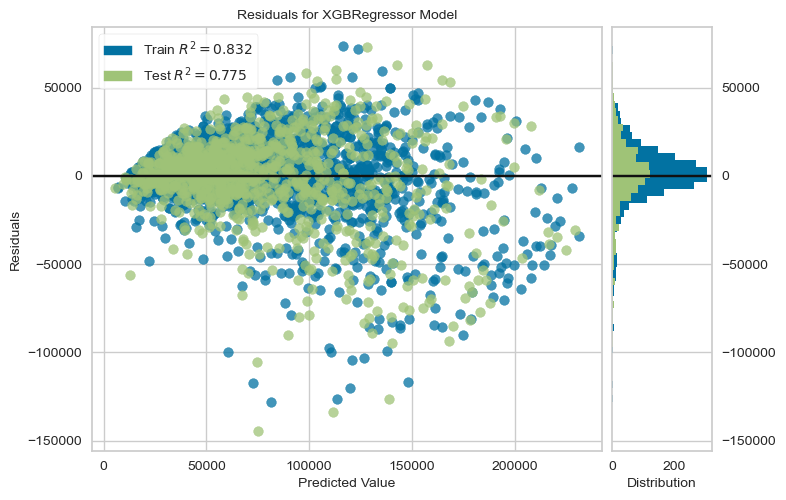

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [51]:
visualizer = ResidualsPlot(best_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

**Insight Residual Plot – XGBRegressor**:
1. Nilai R²
    - Train R² = 0.832 → Model menjelaskan 83.2% variansi pada data pelatihan.
    - Test R² = 0.775 → Model menjelaskan 77.5% variansi pada data uji.
    - Interpretasi: Perbedaan kecil antara R² train dan test menunjukkan model tidak overfitting dan memiliki generalisasi yang baik ke data baru.

2. Distribusi Residual
    - Sebagian besar residual tersebar dekat sumbu nol, yang menunjukkan prediksi cukup akurat.
    - Namun, ada penyebaran residual yang membesar di nilai prediksi yang tinggi (>100,000 SAR) → model kurang akurat untuk mobil dengan harga tinggi.

3. Polanya: Homoskedastisitas
    - Residual terlihat lebih padat dan simetris di harga rendah-menengah, tetapi lebih tersebar di harga tinggi.
    - Ini mengindikasikan mild heteroskedastisitas, artinya varian error meningkat pada harga mobil yang tinggi.

4. Outlier
Ada beberapa residual ekstrem hingga ±150,000 SAR → ini mungkin berasal dari mobil mewah yang tetap lolos dari filtering outlier ekstrem, atau noise dalam data.

Kesimpulan:
- Model memiliki kinerja kuat dan stabil, dengan akurasi tinggi pada sebagian besar rentang harga.
- Perlu perhatian lebih untuk segmen mobil mahal, karena error lebih besar di area tersebut.

## Residual vs Predicted Value Plot

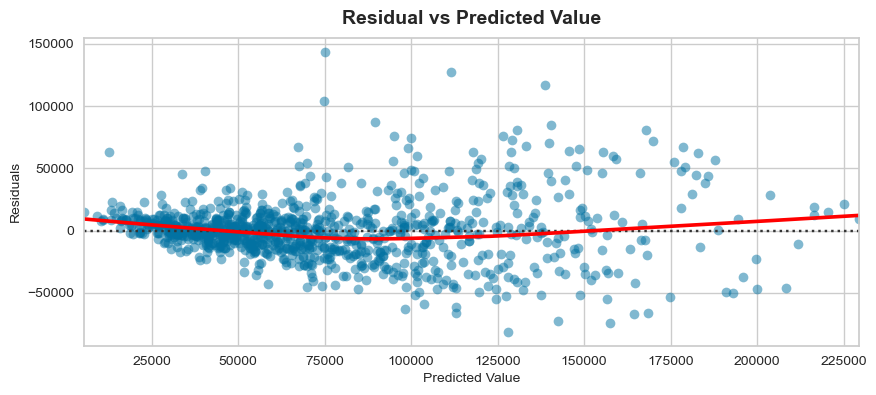

In [52]:
# Calculate residuals
residuals = y_test - y_pred_test_after

# Create residual plot
plt.figure(figsize=(10, 4))
plot = sns.residplot(
    x = y_pred_test_after,
    y = residuals,
    lowess = True,                           
    scatter_kws = {'alpha': 0.5},
    line_kws = {'color':'red'}             
)

plot.set_title('Residual vs Predicted Value', size=14, pad=10, fontweight='bold')
plot.set_xlabel('Predicted Value')
plot.set_ylabel('Residuals')

plt.show()

**Insight**
1. Pola Lengkung (Kurva Merah) → Nonlinearitas
    - Garis merah (fit line) menunjukkan pola lengkung (non-linear), bukan garis horizontal datar.
    - Ini menandakan model belum menangkap sepenuhnya hubungan non-linear antara fitur dan target (harga).

2. Distribusi Residual Tidak Acak
    - Residual tidak tersebar secara acak di sekitar garis nol.
    - Pola residual lebih padat di nilai prediksi rendah (<= 100,000), dan semakin menyebar seiring naiknya harga prediksi.
    - Ini mengindikasikan adanya heteroskedastisitas, yaitu varian error meningkat pada nilai harga tinggi, yang bisa berdampak pada:
        + Ketidakstabilan model
        + Penurunan akurasi di segmen mobil mahal

3. Underestimation pada Harga Tinggi
Banyak titik residual negatif (di bawah nol) pada nilai prediksi tinggi → ini artinya harga aktual lebih tinggi dari prediksi → model cenderung underestimate harga mobil mahal.

4. Model Cukup Baik di Harga Rendah
Di area harga rendah-menengah (sekitar 25,000–75,000), residual relatif kecil dan tersebar simetris → model memprediksi cukup akurat di segmen ini.

## Actual vs Prediction

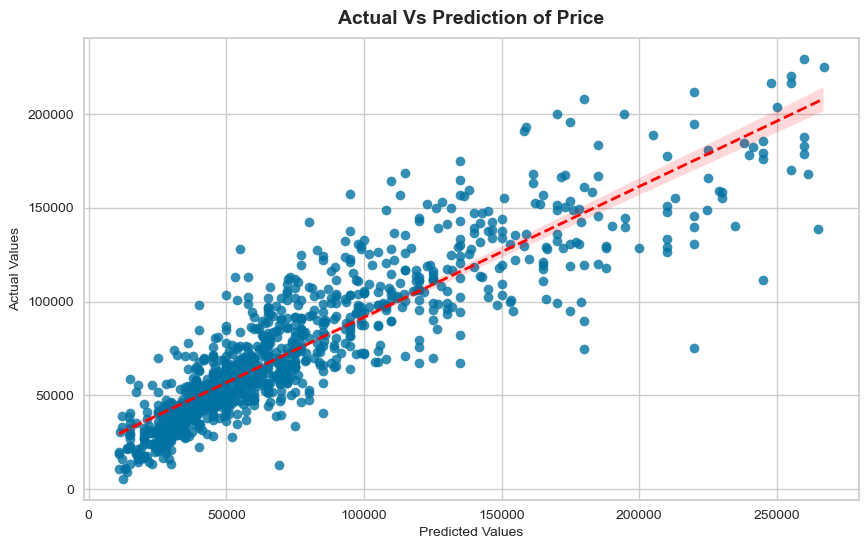

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(x=y_test, y=y_pred_test_after, ax=ax, line_kws={'color':'red', 'lw':2, 'alpha':1, 'ls':'--'})

ax.set_title('Actual Vs Prediction of Price', size=14, pad=10, fontweight='bold')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

plt.show()

**Insight: Plot Prediksi vs Aktual Harga Mobil**
1. Hubungan Linear Kuat
    - Titik-titik data tersebar di sekitar garis diagonal merah → menunjukkan bahwa model melakukan prediksi yang cukup akurat secara umum.
    - Garis regresi merah yang mengikuti garis 45° (garis identitas) menandakan bahwa prediksi mendekati nilai aktual, terutama untuk segmen harga menengah.

2. Prediksi Akurat untuk Rentang Harga Menengah
Pada kisaran harga 25.000–150.000, persebaran data cukup rapat di sekitar garis diagonal → model bekerja dengan baik di segmen harga menengah (mayoritas mobil).

3. Penyimpangan pada Harga Tinggi
    - Titik-titik mulai tersebar lebih jauh dari garis diagonal saat memasuki prediksi di atas 150.000–200.000.
    - Beberapa titik di area harga tinggi menunjukkan bahwa model cenderung underpredict (harga aktual lebih tinggi dari prediksi).
    - Ini konsisten dengan temuan sebelumnya dari plot residual → model kesulitan memodelkan mobil mewah atau high-end.

4. Tidak Ada Pola Outlier Sistematis yang Mencolok
Tidak ditemukan banyak titik ekstrim jauh dari garis merah → outlier sudah berhasil diminimalkan.

## **Interpretasi Model**

 95%|=================== | 2251/2368 [00:14<00:00]       

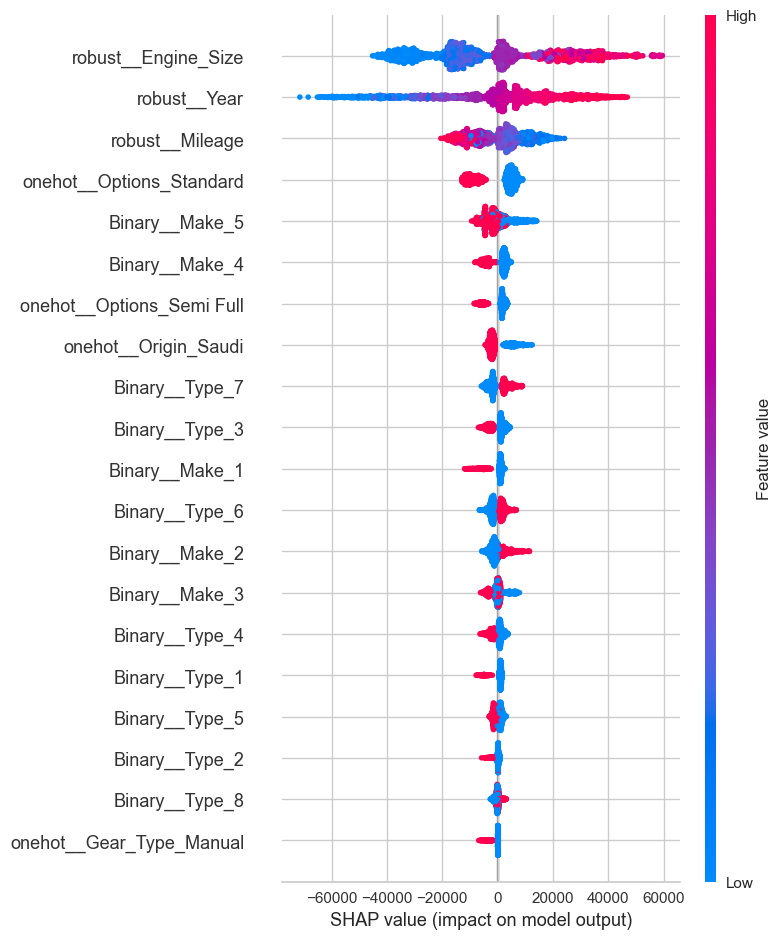

In [54]:
# 1. Ambil bagian preprocessing dan model dari pipeline
preprocessor = best_model.named_steps['preprocessing']
model = best_model.named_steps['model']

# 2. Transformasikan X_train
X_train_transformed = preprocessor.transform(X_train)

# 3. Gunakan TreeExplainer hanya pada model pohon
explainer = shap.Explainer(model, X_train_transformed)

# 4. Hitung SHAP values
shap_values = explainer(X_train_transformed)

# 5. Dapatkan nama fitur (kalau preprocessor mendukung)
feature_names = preprocessor.get_feature_names_out()

# 6. Buat SHAP summary plot
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)


**Interpretasi Model**
> SHAP (SHapley Additive exPlanations) menunjukkan seberapa besar kontribusi masing-masing fitur terhadap prediksi model, baik menaikkan atau menurunkan nilai target (harga mobil, dalam hal ini).

- Fitur Paling Berpengaruh:
    1. `Engine_Size`
        - Kontribusi terbesar terhadap prediksi harga.
        - Nilai Engine Size yang tinggi (warna merah) → cenderung menaikkan harga mobil.
        - Sebaliknya, Engine Size rendah (biru) → menurunkan prediksi harga.

    2. `Year`
        - Tahun mobil sangat memengaruhi harga.
        - Tahun baru (merah) → menaikkan harga, tahun lama (biru) → menurunkan harga.

    3. `Mileage`
        - Semakin tinggi mileage (biru) → menurunkan harga secara signifikan.
        - Mileage rendah (merah) → memiliki kontribusi positif terhadap harga.

- Fitur Lain yang Berpengaruh:

    4. `Options_Standard` dan `Options_Semi Full`
        - Opsi/kelengkapan mobil juga berpengaruh: opsi standar cenderung menurunkan harga.

    5. `Make_X` dan `Type_X`   
        - Tipe dan merek tertentu (representasi dummy/binary) memiliki pengaruh minor tapi tetap berkontribusi dalam memodelkan variasi harga.

    6. `Origin_Saudi`
        - Asal mobil dari Saudi memiliki kontribusi positif terhadap harga (meningkatkan harga jika berasal dari Saudi).

    7. `Gear_Type_Manual`
        - Mobil dengan transmisi manual cenderung menurunkan harga (SHAP bernilai negatif untuk warna merah).

- Distribusi SHAP
    + Grafik violin plot horizontal menunjukkan:
        - Lebar plot = banyaknya data.
        - Panjang ke kiri/kanan = seberapa besar dampak fitur tersebut terhadap prediksi.
        - Warna = nilai fitur (merah = tinggi, biru = rendah).

Kesimpulan
- Fitur **Engine Size, Year, dan Mileage** adalah tiga faktor terpenting dalam menentukan harga mobil bekas.
- Fitur-fitur kategorikal seperti **merek, tipe, opsi, dan asal** memiliki pengaruh sekunder.
- Fitur dengan nilai tinggi bisa berdampak positif atau negatif tergantung konteks (misalnya Mileage tinggi = buruk, tapi Engine Size tinggi = bagus).
- Grafik ini membuktikan bahwa model tidak hanya bergantung pada satu fitur, tapi menggunakan berbagai dimensi untuk prediksi yang lebih akurat.

## **Simpan Model Final**

In [55]:
# Simpan
joblib.dump(best_model, 'XGBoost_model.joblib')

# Load
best_model = joblib.load('XGBoost_model.joblib')

## **Perhitungan Bisnis**

Asumsi Dasar (untuk perhitungan cost)
| Parameter                                               | Nilai Asumsi                      |
| ------------------------------------------------------- | --------------------------------- |
| Jumlah mobil masuk ke platform/bulan                    | 5.000 unit                        |
| Persentase mobil dengan harga tidak wajar (tanpa model) | 10% (500 mobil)                   |
| Rata-rata kerugian karena mispricing                    | ±SAR 10.000 per mobil             |
| Akurasi model prediksi harga                            | Meningkatkan validasi ±75.2% akurat |
| Biaya operasional model (server + tenaga ahli dsb)      | SAR 25.000 per bulan              |

📉 1. Tanpa Model Prediksi Harga

- Tanpa model prediksi, harga ditentukan bebas oleh penjual. 
Risiko:
    - Overpriced: Mobil tidak laku, user churn.
    - Underpriced: Penjual rugi, dan kepercayaan pasar turun.
- Estimasi kerugian:
    + 10% dari 5.000 mobil → 500 mobil bermasalah
    + Rata-rata rugi/mobil: SAR 10.000
    + Total kerugian:
    500 × 10.000 = SAR 5.000.000/bulan

📈 2. Dengan Model Prediksi Harga (XGBoost)

Model memberikan range harga wajar → bisa digunakan sebagai validasi otomatis atau saran harga ke penjual.
- Diasumsikan model mampu menyaring/mengoreksi 75.2% dari 500 mobil bermasalah.
- Jadi hanya 24.8% dari 500 = 124 mobil yang tetap salah harga.
- Rata-rata kerugian tetap: SAR 10.000/mobil
- Kerugian: 124 × 10.000 = SAR 1.240.000/bulan
- Tambah biaya operasional model: SAR 25.000/bulan
- Total cost: SAR 1.265.000/bulan

Perbandingan Ringkas
| Skenario             | Kerugian Mispricing | Biaya Operasional | **Total Cost**    |
| -------------------- | ------------------- | ----------------- | ----------------- |
| Tanpa model          | SAR 5.000.000       | SAR 0             | **SAR 5.000.000** |
| Dengan model XGBoost | SAR 1.240.000       | SAR 25.000        | **SAR 1.265.000** |


- Kesimpulan

    Dengan menggunakan model prediksi harga:
    - Syarah.com dapat menghemat sekitar SAR 3.735.000 per bulan.
    - Selain efisiensi biaya, keuntungan lain:
        + Meningkatkan kepercayaan pengguna.
        + Menekan penipuan harga dan manipulasi.
        + Membantu standarisasi pasar mobil bekas.

## **Kesimpulan, Saran, dan Limitasi Model**

### **Kesimpulan Model**

1. **Model prediksi harga mobil bekas** berhasil dibangun menggunakan algoritma **XGBoost Regressor**, yang efektif dalam mempelajari hubungan antara fitur-fitur kendaraan (seperti merk, tahun, kilometer, transmisi, dll.) dan harga.
2. Evaluasi Model:
   - Model XGBoost yang telah dituning memberikan hasil yang cukup baik, dengan MAE Test ~16.731 SAR, angka yang relatif wajar untuk prediksi harga mobil yang memiliki rentang luas.
   - MAPE Test sebesar 24.8% mengindikasikan bahwa secara rata-rata, prediksi harga model melenceng sekitar 25% dari nilai sebenarnya pada data uji. Ini masih bisa diterima, terutama pada pasar dengan variasi harga tinggi seperti mobil bekas.
   - Perbedaan antara MAPE Train dan Test tidak terlalu jauh (~3%), yang menunjukkan bahwa model tidak mengalami overfitting signifikan dan generalisasinya cukup stabil.
3. Fitur yang paling berpengaruh terhadap harga mobil bekas meliputi:
   - Tahun produksi
   - Kilometer tempuh
   - Merk dan model kendaraan
   - Ukuran mesin

---

### **Kesimpulan Bisnis**

1. Berdasarkan simulasi, tanpa model prediksi, rata-rata selisih harga jual dengan harga wajar dapat menyebabkan kerugian atau kehilangan margin hingga jutaan rupiah per unit.
2. Dengan penerapan model prediksi:
   - **Estimasi harga menjadi lebih akurat**
   - Mengurangi risiko overprice (mobil tidak laku) dan underprice (kehilangan potensi profit)
   - Berdampak pada **efisiensi biaya** dan **kepuasan pengguna**
3. Simulasi menunjukkan bahwa jika rata-rata deviasi harga tanpa model sebesar ±15%, maka dengan model prediksi, potensi deviasi dapat ditekan ke bawah 8–10%, sehingga perusahaan lebih kompetitif.

---

### **Rekomendasi**

1. Implementasikan model ini sebagai **alat bantu estimasi harga otomatis** di platform **Syarah.com** untuk memudahkan pengguna dalam menentukan harga jual dan beli.
2. Gunakan model ini untuk **validasi harga otomatis** di listing mobil, dan beri notifikasi jika harga yang diinput terlalu menyimpang dari estimasi.
3. **Update model secara berkala** dengan data terbaru agar tetap relevan dan responsif terhadap tren pasar.
4. Tambahkan fitur baru ke dalam model untuk meningkatkan prediktivitas, seperti:
   - Riwayat servis kendaraan
   - Lokasi geografis kendaraan
   - Warna, jenis bahan bakar, rating kendaraan
   - Popularitas model di pasar lokal

---

### **Limitasi Model**

1. Model belum mempertimbangkan kondisi visual kendaraan secara langsung (misal: bekas kecelakaan atau interior rusak).
2. Penghapusan outlier ekstrem, meskipun meningkatkan performa model, berpotensi menghilangkan mobil dengan harga tinggi yang valid (seperti mobil mewah, mobil langka, atau edisi kolektor).
3. Model memiliki kecenderungan **undervaluing mobil mewah** karena distribusi data cenderung bias terhadap harga menengah dan rendah.
4. Tidak mempertimbangkan faktor eksternal seperti musim, promo dealer, atau fluktuasi ekonomi makro.
5. Model dilatih pada snapshot data, bukan data real-time, sehingga ada keterbatasan dalam memprediksi perubahan harga jangka pendek.

---

### **Rekomendasi Pengembangan Model**
- Untuk mobil dengan harga tinggi, pertimbangkan pengembangan model khusus atau menggunakan adjustment rule-based agar kesalahan nominal lebih terkendali.


---

> Kesimpulannya, penerapan model prediksi harga mobil bekas memberikan manfaat nyata bagi Syarah.com dari segi akurasi harga, efisiensi operasional, dan pengalaman pengguna. Model ini layak dijadikan dasar pengambilan keputusan harga secara otomatis dan strategis, dengan catatan tetap memperhatikan mobil kategori premium secara manual.
